In [8]:
from jinja2 import Template
import yaml
import copy
import os
import math
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from spectral import imshow, view_cube
import mmcv
import torch 
import warnings
from pathlib import Path
import mmcv
import numpy as np
import torch
from mmcv.ops import RoIPool
import os
import yaml
import numpy as np
import numpy as np
from skimage import transform
import sys
import copy
from scipy.ndimage import zoom
import copy
import yaml
import os
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from mmseg.apis import init_model
import torch
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import cv2
import os
from mmseg.apis import MMSegInferencer
import matplotlib.pyplot as plt
from skimage.io import imsave
import tifffile
import numpy as np
from PIL import Image
import tifffile
import os
from mmseg.apis import MMSegInferencer
import os
import numpy as np
import pygad  # Import the pygad module
from PIL import Image
import tifffile
from skimage.metrics import peak_signal_noise_ratio as psnr
from sklearn.metrics import jaccard_score
import spectral
import gc

In [93]:
def psnr_calc(originals, transformeds):
    #print("psnr is being calculated")
    epsilon = sys.float_info.epsilon
    # Ensure pixel values are in the range [0, max_val]
    
    
    mse = np.mean(np.square(originals - transformeds))
    
    psnr_value = 20 * np.log10(np.max(originals)) - 10 * np.log10(mse+epsilon )
    
    return psnr_value

In [94]:
psnrrr=psnr_calc(original_image,adv_image_denormalized)
print(psnrrr)

28.553335061882542


Text(0.5, 1.0, 'Original Image')

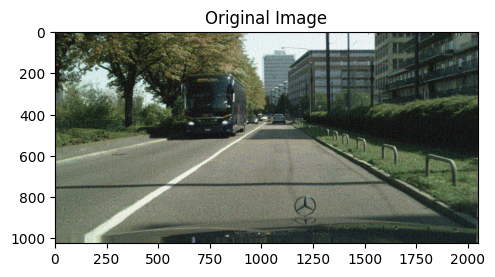

In [92]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(adv_image_denormalized)
plt.title('Original Image')


PSNR: 21.90527289671119


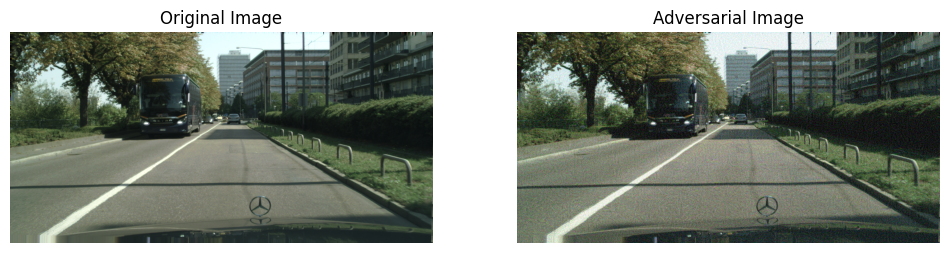

In [95]:
import numpy as np
import matplotlib.pyplot as plt

original_image = image_tensor.squeeze().detach().cpu().numpy()
adversarial_image = adv_image.squeeze().detach().cpu().numpy()





def calculate_psnr(original_image, adversarial_image, data_range=1.0):
    """
    Calculate the Peak Signal-to-Noise Ratio (PSNR) between two images.

    Args:
        original_image (np.ndarray): Original image.
        adversarial_image (np.ndarray): Adversarial image.
        data_range (float): The data range of the input images (default is 1.0).

    Returns:
        float: The PSNR value.
    """
    mse = np.mean((original_image - adversarial_image) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(data_range / np.sqrt(mse))





psnr_value = calculate_psnr(original_image, adversarial_image, data_range=1)

print(f"PSNR: {psnr_value}")

# Visualize the original and adversarial images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(original_image.transpose(1, 2, 0))
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(adversarial_image.transpose(1, 2, 0))
axes[1].set_title("Adversarial Image")
axes[1].axis('off')

plt.show()

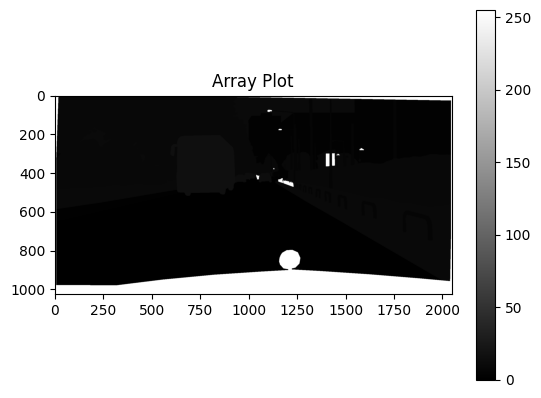

In [60]:
plt.imshow(mask, cmap='gray')  # Use cmap='gray' for grayscale
plt.title('Array Plot')
plt.colorbar()  # Optional: adds a colorbar
plt.show()

In [96]:
config_path = 'F:\\mmsegmentation\\deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_path = 'F:\\mmsegmentation\\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth'
model = init_model(config_path, checkpoint_path, device='cpu')

inferencer = MMSegInferencer(model='deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024', device='cuda')
result_corrupted = inferencer(np.array(adv_image_denormalized), out_dir='F:\\mmsegmentation\\predited_masks', pred_out_dir="pred")

#image_iou = calculate_iou_whole_image(mask, result_corrupted["predictions"], 19)

f:\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: F:\mmsegmentation\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth


c:\Users\Seif\anaconda3\envs\openmmlab\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

c:\Users\Seif\anaconda3\envs\openmmlab\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


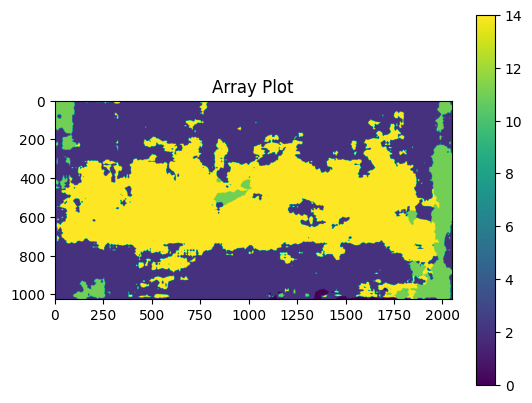

In [97]:
plt.imshow(result_corrupted["predictions"])  # Use cmap='gray' for grayscale
plt.title('Array Plot')
plt.colorbar()  # Optional: adds a colorbar
plt.show()




In [99]:
original_image=original_image.transpose(1, 2, 0)

In [100]:
original_image = Image.open("F:\\mmsegmentation\\cityscapes\\leftImg8bit\\val\\frankfurt\\frankfurt_000000_007365_leftImg8bit.png").convert('RGB')
original_image = np.array(original_image)


In [101]:
original_image

array([[[  3,   8,  19],
        [  3,   9,  18],
        [  4,   9,  18],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   5],
        [  0,   1,   6],
        [  0,   2,   7],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 29,  25,  31],
        [ 28,  25,  30],
        [ 28,  25,  29],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[107, 117, 100],
        [106, 117, 101],
        [106, 117, 101],
        ...,
        [102, 116,  99],
        [101, 115,  98],
        [101, 115,  98]],

       [[107, 117, 100],
        [106, 117, 101],
        [106, 117, 101],
        ...,
        [ 25,  36,  36],
        [103, 116,  98],
        [103, 115,  97]],

       [[107, 117, 100],
        [106, 117, 101],
        [106, 117, 101],
        ...,
        [ 26,  38,  37],
        [ 25,  36,  36],
        [ 24,  35,  36]]

In [102]:
config_path = 'F:\\mmsegmentation\\deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_path = 'F:\\mmsegmentation\\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth'
model = init_model(config_path, checkpoint_path, device='cuda')
inferencer = MMSegInferencer(model='deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024', device='cuda')
result_clean = inferencer(np.array(original_image), out_dir='F:\\mmsegmentation\\predited_masks', pred_out_dir="pred")


Loads checkpoint by local backend from path: F:\mmsegmentation\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth


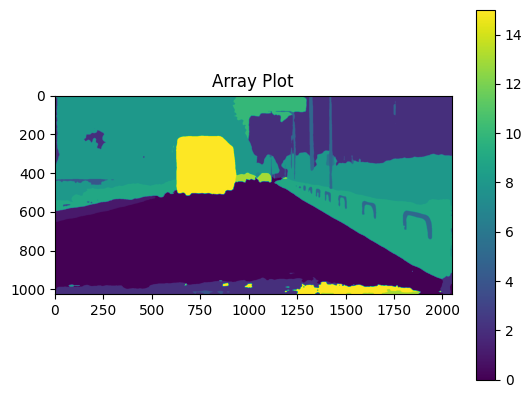

In [103]:
plt.imshow(result_clean["predictions"])  # Use cmap='gray' for grayscale
plt.title('Array Plot')
plt.colorbar()  # Optional: adds a colorbar
plt.show()


In [104]:
def calculate_iou_whole_image(pred_clean, pred_noisy, num_classes):
    # Ensure the arrays have the same shape
    #assert pred_clean.shape == pred_noisy.shape, "Shape mismatch between clean and noisy predictions"
    
    intersection = 0
    union = 0
    
    for cls in range(num_classes):
        pred_clean_class = (pred_clean == cls)
        pred_noisy_class = (pred_noisy == cls)
        
        # Calculate intersection and union for each class
        cls_intersection = np.sum(pred_clean_class & pred_noisy_class)
        cls_union = np.sum(pred_clean_class | pred_noisy_class)
        
        intersection += cls_intersection
        union += cls_union
    
    # Avoid division by zero
    if union == 0:
        return 0.0
    
    # Calculate IoU
    iou = intersection / union
    return iou

In [ ]:
config_path = 'F:\\mmsegmentation\\deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_path = 'F:\\mmsegmentation\\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth'
model = init_model(config_path, checkpoint_path, device='cpu')

# Load the image and convert it to a tensor
image_path = 'F:\\mmsegmentation\\cityscapes\\leftImg8bit\\val\\frankfurt\\frankfurt_000000_007365_leftImg8bit.png'
label_path = 'F:\\mmsegmentation\\cityscapes\\gtFine\\val\\frankfurt\\frankfurt_000000_007365_gtFine_labelTrainIds.png'

In [1]:
import os
import torch
import warnings
from torchvision import transforms
from torchvision.transforms.functional import resize
from PIL import Image
from mmseg.apis import init_model
import numpy as np
from monai.losses import DiceCELoss
from mmseg.apis import MMSegInferencer
import sys

# Define the PGD function (as provided)
def projected_gradient_descent_l_inf(model, images, labels, loss_fn, steps=10, alpha=0.08, eps=0.09, random_start=True, device=None, targeted=False, verbose=True):
    if verbose:
        print(f"\nPGD: alpha={alpha} , eps={eps*255} , steps={steps} , targeted={targeted}\n")
        if images.max() > 1 or images.min() < 0:
            warnings.warn(f"PGD Attack: Image values are expected to be in the range of [0,1], instead found [min,max]=[{images.min().item()} , {images.max().item()}]")

    images = images.clone().detach().to(device)
    labels = labels.clone().detach().to(device)
    
    adv_images = images.clone().detach()

    if random_start:
        adv_images = adv_images + torch.empty_like(adv_images).uniform_(-eps, eps)
        adv_images = torch.clamp(adv_images, min=0, max=1).detach()

    for i in range(steps):
        adv_images.requires_grad = True
        adv_logits = model(adv_images)

        if targeted:
            loss = -1 * loss_fn(adv_logits, labels)
        else:
            loss = loss_fn(adv_logits, labels)

        if verbose:
            if i == 0 or (i + 1) % 10 == 0:
                print("Step:", str(i + 1).zfill(3), " ,   Loss:", f"{round(loss.item(), 5):3.5f}")

        grad = torch.autograd.grad(loss, adv_images, retain_graph=False, create_graph=False)[0]
        adv_images = adv_images.detach() + alpha * grad.sign()

        delta = torch.clamp(adv_images - images, min=-eps, max=eps)
        adv_images = torch.clamp(images + delta, min=0, max=1).detach()

    return adv_images

# Function to calculate PSNR
def psnr_calc(originals, transformeds):
    epsilon = sys.float_info.epsilon
    mse = np.mean(np.square(originals - transformeds))
    psnr_value = 20 * np.log10(np.max(originals)) - 10 * np.log10(mse + epsilon)
    return psnr_value

# Function to calculate IoU
def calculate_iou(pred, gt, num_classes):
    ious = []
    
    for cls in range(num_classes):
        pred_class = (pred == cls)
        gt_class = (gt == cls)
        
        intersection = np.logical_and(pred_class, gt_class).sum()
        union = np.logical_or(pred_class, gt_class).sum()
        
        if union == 0:
            iou = float('nan')  # Ignore this class if there is no ground truth
        else:
            iou = intersection / union
        
        ious.append(iou)
    
    mean_iou = np.nanmean(ious)  # Compute mean IoU, ignoring nan values
    return mean_iou

def calculate_iou_whole_image(pred_clean, pred_noisy, num_classes):
    # Ensure the arrays have the same shape
    #assert pred_clean.shape == pred_noisy.shape, "Shape mismatch between clean and noisy predictions"
    
    intersection = 0
    union = 0
    
    for cls in range(num_classes):
        pred_clean_class = (pred_clean == cls)
        pred_noisy_class = (pred_noisy == cls)
        
        # Calculate intersection and union for each class
        cls_intersection = np.sum(pred_clean_class & pred_noisy_class)
        cls_union = np.sum(pred_clean_class | pred_noisy_class)
        
        intersection += cls_intersection
        union += cls_union
    
    # Avoid division by zero
    if union == 0:
        return 0.0
    
    # Calculate IoU
    iou = intersection / union
    return iou

# Define dataset paths
image_dir = 'C:\\Users\\Shadow\\Desktop\\mmseg\\cityscapes\\cityscapes\\leftImg8bit\\val'
label_dir = 'C:\\Users\\Shadow\\Desktop\\mmseg\\cityscapes\\cityscapes\\gtFine\\val'

# Initialize model
print("Initializing model...")
config_path = 'C:\\Users\\Shadow\\Desktop\\mmseg\\deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_path = 'C:\\Users\\Shadow\\Desktop\\mmseg\\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = init_model(config_path, checkpoint_path, device=device)

# Initialize inferencer
print("Initializing inferencer...")
inferencer = MMSegInferencer(model='deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024', device=device)

# Define transformations
transform = transforms.ToTensor()

# Define the loss function
loss_fn = DiceCELoss(to_onehot_y=True, softmax=True, squared_pred=True, smooth_nr=0.0, smooth_dr=1e-6)

# Initialize lists to store IoU and PSNR values
iou_list = []
psnr_list = []

# Iterate over all images in the dataset
print("Starting image processing...")
for city in os.listdir(image_dir):
    print(f"Processing city: {city}")
    city_image_dir = os.path.join(image_dir, city)
    city_label_dir = os.path.join(label_dir, city)
    
    for img_file in os.listdir(city_image_dir):
        print(f"Processing image: {img_file}")
        image_path = os.path.join(city_image_dir, img_file)
        label_path = os.path.join(city_label_dir, img_file.replace('_leftImg8bit.png', '_gtFine_labelTrainIds.png'))
        
        image = Image.open(image_path).convert('RGB')
        image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
        
        label_image = Image.open(label_path)  # Load label image
        label_tensor = torch.tensor(np.array(label_image), dtype=torch.long).unsqueeze(0).unsqueeze(0)  # Convert to tensor and add batch dimension and channel dimension
        
        valid_mask = (label_tensor != 255)
        label_tensor[label_tensor == 255] = 0
        
        output_size = (128, 256)  # Adjust this to match the model's output dimensions
        label_tensor_resized = resize(label_tensor, output_size, interpolation=transforms.InterpolationMode.NEAREST)
        
        print("Running PGD attack...")
        adv_image = projected_gradient_descent_l_inf(
            model, 
            image_tensor, 
            label_tensor_resized,  # Use resized labels
            loss_fn, 
            steps=10, 
            alpha=0.1, 
            eps=0.1, 
            random_start=True, 
            device=device, 
            targeted=False, 
            verbose=False
        )
        
        # Inference
        print("Running inference on original image...")
        original_image_np = np.array(image)
        adv_image_np = adv_image.squeeze().cpu().numpy().transpose(1, 2, 0) * 255  # Convert to numpy and scale back to [0, 255]
        
        result_clean = inferencer(original_image_np, out_dir='C:\\Users\\Shadow\\Desktop\\mmseg\\predicted_masks', pred_out_dir="pred")
        result_corrupted = inferencer(adv_image_np, out_dir='C:\\Users\\Shadow\\Desktop\\mmseg\\predicted_masks', pred_out_dir="pred")
        
        # Calculate metrics
        print("Calculating IoU and PSNR...")
        iou = calculate_iou_whole_image(result_corrupted['predictions'], np.array(label_image), 19)
        psnr = psnr_calc(original_image_np, adv_image_np)
        
        # Store the results
        iou_list.append(iou)
        psnr_list.append(psnr)
        
        # Print individual results (optional)
        print(f"Image: {img_file}, IoU: {iou:.4f}, PSNR: {psnr:.4f}")
        
        # Clear GPU memory
        torch.cuda.empty_cache()

# Calculate mean IoU and PSNR
print("Calculating mean IoU and PSNR...")
mean_iou = np.mean(iou_list)
mean_psnr = np.mean(psnr_list)

# Print mean values
print(f"\nMean IoU: {mean_iou:.4f}")
print(f"Mean PSNR: {mean_psnr:.4f}")

Initializing model...


c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\mmseg\models\losses\cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: C:\Users\Shadow\Desktop\mmseg\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
Initializing inferencer...
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
07/11 14:48:26 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.
Starting image processing...
Processing city: frankfurt
Processing image: frankfurt_000000_000294_leftImg8bit.png
Running PGD attack...


c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


Running inference on original image...


c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Calculating IoU and PSNR...
Image: frankfurt_000000_000294_leftImg8bit.png, IoU: 0.1532, PSNR: 21.8936
Processing image: frankfurt_000000_000576_leftImg8bit.png
Running PGD attack...
Running inference on original image...


In [1]:
import os
import torch
import warnings
from torchvision import transforms
from torchvision.transforms.functional import resize
from PIL import Image
from mmseg.apis import init_model
import numpy as np
from monai.losses import DiceCELoss
from mmseg.apis import MMSegInferencer
import sys
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger()
file_handler = logging.FileHandler('output_fgsm_final.log')
file_handler.setLevel(logging.INFO)
logger.addHandler(file_handler)

# Define the FGSM function
def fast_gradient_sign_method_l_inf(model, images, labels, loss_fn, eps=100, device=None, targeted=False, verbose=True):
    if verbose:
        logger.info(f"\nFGSM: eps={eps*255} , targeted={targeted}\n")
        if images.max() > 1 or images.min() < 0:
            warnings.warn(f"FGSM Attack: Image values are expected to be in the range of [0,1], instead found [min,max]=[{images.min().item()} , {images.max().item()}]")

    images = images.clone().detach().to(device)
    labels = labels.clone().detach().to(device)

    images.requires_grad = True
    logits = model(images)

    # calculate loss
    if targeted:
        loss = -loss_fn(logits, labels)
    else:
        loss = loss_fn(logits, labels)

    # update adversarial images
    grad = torch.autograd.grad(loss, images, retain_graph=False, create_graph=False)[0]
    adv_images = images + eps * grad.sign()
    adv_images = torch.clamp(adv_images, min=0, max=1).detach()

    return adv_images

# Function to calculate PSNR
def psnr_calc(originals, transformeds):
    epsilon = sys.float_info.epsilon
    mse = np.mean(np.square(originals - transformeds))
    psnr_value = 20 * np.log10(np.max(originals)) - 10 * np.log10(mse + epsilon)
    return psnr_value

# Function to calculate IoU
def calculate_iou(pred, gt, num_classes):
    ious = []
    
    for cls in range(num_classes):
        pred_class = (pred == cls)
        gt_class = (gt == cls)
        
        intersection = np.logical_and(pred_class, gt_class).sum()
        union = np.logical_or(pred_class, gt_class).sum()
        
        if union == 0:
            iou = float('nan')  # Ignore this class if there is no ground truth
        else:
            iou = intersection / union
        
        ious.append(iou)
    
    mean_iou = np.nanmean(ious)  # Compute mean IoU, ignoring nan values
    return mean_iou

def calculate_iou_whole_image(pred_clean, pred_noisy, num_classes):
    intersection = 0
    union = 0
    
    for cls in range(num_classes):
        pred_clean_class = (pred_clean == cls)
        pred_noisy_class = (pred_noisy == cls)
        
        # Calculate intersection and union for each class
        cls_intersection = np.sum(pred_clean_class & pred_noisy_class)
        cls_union = np.sum(pred_clean_class | pred_noisy_class)
        
        intersection += cls_intersection
        union += cls_union
    
    # Avoid division by zero
    if union == 0:
        return 0.0
    
    # Calculate IoU
    iou = intersection / union
    return iou

# Define dataset paths
image_dir = 'C:\\Users\\Shadow\\Desktop\\mmseg\\cityscapes\\cityscapes\\leftImg8bit\\val'
label_dir = 'C:\\Users\\Shadow\\Desktop\\mmseg\\cityscapes\\cityscapes\\gtFine\\val'

# Initialize model
logger.info("Initializing model...")
config_path = 'C:\\Users\\Shadow\\Desktop\\mmseg\\deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_path = 'C:\\Users\\Shadow\\Desktop\\mmseg\\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = init_model(config_path, checkpoint_path, device=device)

# Initialize inferencer
logger.info("Initializing inferencer...")
inferencer = MMSegInferencer(model='deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024', device=device)

# Define transformations
transform = transforms.ToTensor()

# Define the loss function
loss_fn = DiceCELoss(to_onehot_y=True, softmax=True, squared_pred=True, smooth_nr=0.0, smooth_dr=1e-6)

# Initialize lists to store IoU and PSNR values
iou_list_before = []
iou_list_after = []
psnr_list_before = []
psnr_list_after = []

# Iterate over all images in the dataset
logger.info("Starting image processing...")
for city in os.listdir(image_dir):
    logger.info(f"Processing city: {city}")
    city_image_dir = os.path.join(image_dir, city)
    city_label_dir = os.path.join(label_dir, city)
    
    for img_file in os.listdir(city_image_dir):
        logger.info(f"Processing image: {img_file}")
        image_path = os.path.join(city_image_dir, img_file)
        label_path = os.path.join(city_label_dir, img_file.replace('_leftImg8bit.png', '_gtFine_labelTrainIds.png'))
        
        image = Image.open(image_path).convert('RGB')
        image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
        
        label_image = Image.open(label_path)  # Load label image
        label_tensor = torch.tensor(np.array(label_image), dtype=torch.long).unsqueeze(0).unsqueeze(0)  # Convert to tensor and add batch dimension and channel dimension
        
        valid_mask = (label_tensor != 255)
        label_tensor[label_tensor == 255] = 0
        
        output_size = (128, 256)  # Adjust this to match the model's output dimensions
        label_tensor_resized = resize(label_tensor, output_size, interpolation=transforms.InterpolationMode.NEAREST)
        
        logger.info("Running FGSM attack...")
        adv_image = fast_gradient_sign_method_l_inf(
            model, 
            image_tensor, 
            label_tensor_resized,  # Use resized labels
            loss_fn, 
            eps=24/255, 
            device=device, 
            targeted=False, 
            verbose=False
        )
        
        # Inference
        logger.info("Running inference on original image...")
        original_image_np = np.array(image)
        adv_image_np = adv_image.squeeze().cpu().numpy().transpose(1, 2, 0) * 255  # Convert to numpy and scale back to [0, 255]
        
        result_clean = inferencer(original_image_np, out_dir='C:\\Users\\Shadow\\Desktop\\mmseg\\predicted_masks', pred_out_dir="pred")
        result_corrupted = inferencer(adv_image_np, out_dir='C:\\Users\\Shadow\\Desktop\\mmseg\\predicted_masks', pred_out_dir="pred")
        
        # Calculate metrics
        logger.info("Calculating IoU and PSNR...")
        iou_before = calculate_iou_whole_image( np.array(label_image),result_clean['predictions'],  19)
        iou_after = calculate_iou_whole_image( np.array(label_image),result_corrupted['predictions'], 19)
        psnr_before = psnr_calc(original_image_np, original_image_np)
        psnr_after = psnr_calc(original_image_np, adv_image_np)
        
        # Store the results
        iou_list_before.append(iou_before)
        iou_list_after.append(iou_after)
        psnr_list_before.append(psnr_before)
        psnr_list_after.append(psnr_after)
        
        # Print individual results (optional)
        logger.info(f"Image: {img_file}, IoU (before attack): {iou_before:.4f}, IoU (after attack): {iou_after:.4f}, PSNR (before attack): {psnr_before:.4f}, PSNR (after attack): {psnr_after:.4f}")
        
        # Clear GPU memory
        torch.cuda.empty_cache()

# Calculate mean IoU and PSNR
logger.info("Calculating mean IoU and PSNR...")
mean_iou_before = np.mean(iou_list_before)
mean_iou_after = np.mean(iou_list_after)
mean_psnr_before = np.mean(psnr_list_before)
mean_psnr_after = np.mean(psnr_list_after)

# Print mean values
logger.info(f"\nMean IoU (before attack): {mean_iou_before:.4f}")
logger.info(f"Mean IoU (after attack): {mean_iou_after:.4f}")
logger.info(f"Mean PSNR (before attack): {mean_psnr_before:.4f}")
logger.info(f"Mean PSNR (after attack): {mean_psnr_after:.4f}")


Initializing model...
c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\mmseg\models\losses\cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: C:\Users\Shadow\Desktop\mmseg\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth


Initializing inferencer...


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
07/13 16:07:39 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.


c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
Starting image processing...
Processing city: frankfurt
Processing image: frankfurt_000000_000294_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Calculating IoU and PSNR...
Image: frankfurt_000000_000294_leftImg8bit.png, IoU (before attack): 0.8424, IoU (after attack): 0.2015, PSNR (before attack): 204.6606, PSNR (after attack): 20.6556
Processing image: frankfurt_000000_000576_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_000576_leftImg8bit.png, IoU (before attack): 0.8363, IoU (after attack): 0.1535, PSNR (before attack): 204.6606, PSNR (after attack): 20.6712
Processing image: frankfurt_000000_001016_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_001016_leftImg8bit.png, IoU (before attack): 0.8445, IoU (after attack): 0.2435, PSNR (before attack): 204.6606, PSNR (after attack): 20.9479
Processing image: frankfurt_000000_001236_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_001236_leftImg8bit.png, IoU (before attack): 0.8282, IoU (after attack): 0.0185, PSNR (before attack): 204.6606, PSNR (after attack): 20.5913
Processing image: frankfurt_000000_001751_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_001751_leftImg8bit.png, IoU (before attack): 0.7664, IoU (after attack): 0.1064, PSNR (before attack): 204.6606, PSNR (after attack): 20.5490
Processing image: frankfurt_000000_002196_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_002196_leftImg8bit.png, IoU (before attack): 0.8324, IoU (after attack): 0.1638, PSNR (before attack): 204.6606, PSNR (after attack): 20.6359
Processing image: frankfurt_000000_002963_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_002963_leftImg8bit.png, IoU (before attack): 0.8222, IoU (after attack): 0.0626, PSNR (before attack): 204.6606, PSNR (after attack): 20.8209
Processing image: frankfurt_000000_003025_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_003025_leftImg8bit.png, IoU (before attack): 0.7442, IoU (after attack): 0.0686, PSNR (before attack): 204.6606, PSNR (after attack): 20.6033
Processing image: frankfurt_000000_003357_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_003357_leftImg8bit.png, IoU (before attack): 0.8037, IoU (after attack): 0.0572, PSNR (before attack): 204.6606, PSNR (after attack): 20.6938
Processing image: frankfurt_000000_003920_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_003920_leftImg8bit.png, IoU (before attack): 0.7772, IoU (after attack): 0.0758, PSNR (before attack): 204.6606, PSNR (after attack): 20.6120
Processing image: frankfurt_000000_004617_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_004617_leftImg8bit.png, IoU (before attack): 0.7384, IoU (after attack): 0.0333, PSNR (before attack): 204.6606, PSNR (after attack): 20.7106
Processing image: frankfurt_000000_005543_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_005543_leftImg8bit.png, IoU (before attack): 0.6917, IoU (after attack): 0.0543, PSNR (before attack): 204.6606, PSNR (after attack): 20.5599
Processing image: frankfurt_000000_005898_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_005898_leftImg8bit.png, IoU (before attack): 0.7898, IoU (after attack): 0.0136, PSNR (before attack): 204.6606, PSNR (after attack): 20.5597
Processing image: frankfurt_000000_006589_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_006589_leftImg8bit.png, IoU (before attack): 0.7870, IoU (after attack): 0.0742, PSNR (before attack): 204.6606, PSNR (after attack): 20.5505
Processing image: frankfurt_000000_007365_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_007365_leftImg8bit.png, IoU (before attack): 0.8075, IoU (after attack): 0.0588, PSNR (before attack): 204.6606, PSNR (after attack): 20.6521
Processing image: frankfurt_000000_008206_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_008206_leftImg8bit.png, IoU (before attack): 0.7745, IoU (after attack): 0.0350, PSNR (before attack): 204.6606, PSNR (after attack): 20.6855
Processing image: frankfurt_000000_008451_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_008451_leftImg8bit.png, IoU (before attack): 0.7677, IoU (after attack): 0.0419, PSNR (before attack): 204.6606, PSNR (after attack): 20.6404
Processing image: frankfurt_000000_009291_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_009291_leftImg8bit.png, IoU (before attack): 0.7809, IoU (after attack): 0.0525, PSNR (before attack): 204.6606, PSNR (after attack): 20.5931
Processing image: frankfurt_000000_009561_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_009561_leftImg8bit.png, IoU (before attack): 0.6262, IoU (after attack): 0.0235, PSNR (before attack): 204.6606, PSNR (after attack): 20.5605
Processing image: frankfurt_000000_009688_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_009688_leftImg8bit.png, IoU (before attack): 0.7150, IoU (after attack): 0.0700, PSNR (before attack): 204.6606, PSNR (after attack): 20.5247
Processing image: frankfurt_000000_009969_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_009969_leftImg8bit.png, IoU (before attack): 0.7673, IoU (after attack): 0.0817, PSNR (before attack): 204.6606, PSNR (after attack): 20.6103
Processing image: frankfurt_000000_010351_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_010351_leftImg8bit.png, IoU (before attack): 0.8286, IoU (after attack): 0.0863, PSNR (before attack): 204.6606, PSNR (after attack): 20.9201
Processing image: frankfurt_000000_010763_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_010763_leftImg8bit.png, IoU (before attack): 0.8001, IoU (after attack): 0.1019, PSNR (before attack): 204.6606, PSNR (after attack): 20.6066
Processing image: frankfurt_000000_011007_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_011007_leftImg8bit.png, IoU (before attack): 0.7930, IoU (after attack): 0.1017, PSNR (before attack): 204.6606, PSNR (after attack): 20.5852
Processing image: frankfurt_000000_011074_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_011074_leftImg8bit.png, IoU (before attack): 0.7055, IoU (after attack): 0.1286, PSNR (before attack): 204.6606, PSNR (after attack): 20.5989
Processing image: frankfurt_000000_011461_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_011461_leftImg8bit.png, IoU (before attack): 0.7483, IoU (after attack): 0.0243, PSNR (before attack): 204.6606, PSNR (after attack): 20.6422
Processing image: frankfurt_000000_011810_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_011810_leftImg8bit.png, IoU (before attack): 0.7640, IoU (after attack): 0.0450, PSNR (before attack): 204.6606, PSNR (after attack): 20.6704
Processing image: frankfurt_000000_012009_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_012009_leftImg8bit.png, IoU (before attack): 0.7420, IoU (after attack): 0.1440, PSNR (before attack): 204.6606, PSNR (after attack): 20.6539
Processing image: frankfurt_000000_012121_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_012121_leftImg8bit.png, IoU (before attack): 0.7273, IoU (after attack): 0.1347, PSNR (before attack): 204.6606, PSNR (after attack): 20.7109
Processing image: frankfurt_000000_012868_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_012868_leftImg8bit.png, IoU (before attack): 0.8006, IoU (after attack): 0.1390, PSNR (before attack): 204.6606, PSNR (after attack): 20.7350
Processing image: frankfurt_000000_013067_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_013067_leftImg8bit.png, IoU (before attack): 0.7428, IoU (after attack): 0.0989, PSNR (before attack): 204.6606, PSNR (after attack): 20.6277
Processing image: frankfurt_000000_013240_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_013240_leftImg8bit.png, IoU (before attack): 0.7658, IoU (after attack): 0.2358, PSNR (before attack): 204.6606, PSNR (after attack): 20.6203
Processing image: frankfurt_000000_013382_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_013382_leftImg8bit.png, IoU (before attack): 0.8427, IoU (after attack): 0.1693, PSNR (before attack): 204.6606, PSNR (after attack): 20.7339
Processing image: frankfurt_000000_013942_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_013942_leftImg8bit.png, IoU (before attack): 0.7623, IoU (after attack): 0.1127, PSNR (before attack): 204.6606, PSNR (after attack): 20.5971
Processing image: frankfurt_000000_014480_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_014480_leftImg8bit.png, IoU (before attack): 0.7586, IoU (after attack): 0.1016, PSNR (before attack): 204.6606, PSNR (after attack): 20.6242
Processing image: frankfurt_000000_015389_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_015389_leftImg8bit.png, IoU (before attack): 0.8047, IoU (after attack): 0.0851, PSNR (before attack): 204.6606, PSNR (after attack): 20.6234
Processing image: frankfurt_000000_015676_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_015676_leftImg8bit.png, IoU (before attack): 0.7544, IoU (after attack): 0.0940, PSNR (before attack): 204.6606, PSNR (after attack): 20.6191
Processing image: frankfurt_000000_016005_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_016005_leftImg8bit.png, IoU (before attack): 0.7422, IoU (after attack): 0.0383, PSNR (before attack): 204.6606, PSNR (after attack): 20.5892
Processing image: frankfurt_000000_016286_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_016286_leftImg8bit.png, IoU (before attack): 0.6547, IoU (after attack): 0.0283, PSNR (before attack): 204.6606, PSNR (after attack): 20.5385
Processing image: frankfurt_000000_017228_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_017228_leftImg8bit.png, IoU (before attack): 0.7307, IoU (after attack): 0.0190, PSNR (before attack): 204.6606, PSNR (after attack): 20.5617
Processing image: frankfurt_000000_017476_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_017476_leftImg8bit.png, IoU (before attack): 0.7422, IoU (after attack): 0.0193, PSNR (before attack): 204.6606, PSNR (after attack): 20.7039
Processing image: frankfurt_000000_018797_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_018797_leftImg8bit.png, IoU (before attack): 0.8324, IoU (after attack): 0.0957, PSNR (before attack): 204.6606, PSNR (after attack): 20.6690
Processing image: frankfurt_000000_019607_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_019607_leftImg8bit.png, IoU (before attack): 0.7965, IoU (after attack): 0.1636, PSNR (before attack): 204.6606, PSNR (after attack): 20.6194
Processing image: frankfurt_000000_020215_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_020215_leftImg8bit.png, IoU (before attack): 0.8228, IoU (after attack): 0.0660, PSNR (before attack): 204.6606, PSNR (after attack): 20.6088
Processing image: frankfurt_000000_020321_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_020321_leftImg8bit.png, IoU (before attack): 0.8088, IoU (after attack): 0.0934, PSNR (before attack): 204.6606, PSNR (after attack): 20.5943
Processing image: frankfurt_000000_020880_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_020880_leftImg8bit.png, IoU (before attack): 0.8272, IoU (after attack): 0.0877, PSNR (before attack): 204.6606, PSNR (after attack): 20.5733
Processing image: frankfurt_000000_021667_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_021667_leftImg8bit.png, IoU (before attack): 0.8493, IoU (after attack): 0.1129, PSNR (before attack): 204.6606, PSNR (after attack): 20.6259
Processing image: frankfurt_000000_021879_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_021879_leftImg8bit.png, IoU (before attack): 0.8241, IoU (after attack): 0.0455, PSNR (before attack): 204.6606, PSNR (after attack): 20.6028
Processing image: frankfurt_000000_022254_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_022254_leftImg8bit.png, IoU (before attack): 0.7965, IoU (after attack): 0.1415, PSNR (before attack): 204.6606, PSNR (after attack): 20.5351
Processing image: frankfurt_000000_022797_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_022797_leftImg8bit.png, IoU (before attack): 0.8110, IoU (after attack): 0.0960, PSNR (before attack): 204.6606, PSNR (after attack): 20.7486
Processing image: frankfurt_000001_000538_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_000538_leftImg8bit.png, IoU (before attack): 0.7988, IoU (after attack): 0.1245, PSNR (before attack): 204.6606, PSNR (after attack): 20.5451
Processing image: frankfurt_000001_001464_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_001464_leftImg8bit.png, IoU (before attack): 0.7848, IoU (after attack): 0.0739, PSNR (before attack): 204.6606, PSNR (after attack): 20.5581
Processing image: frankfurt_000001_002512_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_002512_leftImg8bit.png, IoU (before attack): 0.7059, IoU (after attack): 0.1015, PSNR (before attack): 204.6606, PSNR (after attack): 20.6230
Processing image: frankfurt_000001_002646_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_002646_leftImg8bit.png, IoU (before attack): 0.7890, IoU (after attack): 0.1132, PSNR (before attack): 204.6606, PSNR (after attack): 20.5951
Processing image: frankfurt_000001_002759_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_002759_leftImg8bit.png, IoU (before attack): 0.6439, IoU (after attack): 0.1423, PSNR (before attack): 204.6606, PSNR (after attack): 20.5836
Processing image: frankfurt_000001_003056_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_003056_leftImg8bit.png, IoU (before attack): 0.8136, IoU (after attack): 0.0626, PSNR (before attack): 204.6606, PSNR (after attack): 20.6222
Processing image: frankfurt_000001_003588_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_003588_leftImg8bit.png, IoU (before attack): 0.7293, IoU (after attack): 0.1058, PSNR (before attack): 204.6606, PSNR (after attack): 20.5983
Processing image: frankfurt_000001_004327_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_004327_leftImg8bit.png, IoU (before attack): 0.6647, IoU (after attack): 0.0399, PSNR (before attack): 204.6606, PSNR (after attack): 20.5551
Processing image: frankfurt_000001_004736_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_004736_leftImg8bit.png, IoU (before attack): 0.7441, IoU (after attack): 0.0735, PSNR (before attack): 204.6606, PSNR (after attack): 20.5735
Processing image: frankfurt_000001_004859_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_004859_leftImg8bit.png, IoU (before attack): 0.6877, IoU (after attack): 0.0622, PSNR (before attack): 204.6606, PSNR (after attack): 20.5679
Processing image: frankfurt_000001_005184_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_005184_leftImg8bit.png, IoU (before attack): 0.6977, IoU (after attack): 0.0528, PSNR (before attack): 204.6606, PSNR (after attack): 20.5431
Processing image: frankfurt_000001_005410_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_005410_leftImg8bit.png, IoU (before attack): 0.7758, IoU (after attack): 0.0500, PSNR (before attack): 204.6606, PSNR (after attack): 20.5949
Processing image: frankfurt_000001_005703_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_005703_leftImg8bit.png, IoU (before attack): 0.7452, IoU (after attack): 0.0329, PSNR (before attack): 204.6606, PSNR (after attack): 20.6093
Processing image: frankfurt_000001_005898_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_005898_leftImg8bit.png, IoU (before attack): 0.7614, IoU (after attack): 0.0215, PSNR (before attack): 204.6606, PSNR (after attack): 20.5719
Processing image: frankfurt_000001_007285_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_007285_leftImg8bit.png, IoU (before attack): 0.7689, IoU (after attack): 0.0933, PSNR (before attack): 204.6606, PSNR (after attack): 20.5557
Processing image: frankfurt_000001_007407_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_007407_leftImg8bit.png, IoU (before attack): 0.7636, IoU (after attack): 0.1036, PSNR (before attack): 204.6606, PSNR (after attack): 20.5753
Processing image: frankfurt_000001_007622_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_007622_leftImg8bit.png, IoU (before attack): 0.6428, IoU (after attack): 0.1208, PSNR (before attack): 204.6606, PSNR (after attack): 20.6567
Processing image: frankfurt_000001_007857_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_007857_leftImg8bit.png, IoU (before attack): 0.7948, IoU (after attack): 0.1005, PSNR (before attack): 204.6606, PSNR (after attack): 20.6486
Processing image: frankfurt_000001_007973_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_007973_leftImg8bit.png, IoU (before attack): 0.7577, IoU (after attack): 0.1287, PSNR (before attack): 204.6606, PSNR (after attack): 20.6400
Processing image: frankfurt_000001_008200_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_008200_leftImg8bit.png, IoU (before attack): 0.8043, IoU (after attack): 0.1587, PSNR (before attack): 204.6606, PSNR (after attack): 20.6038
Processing image: frankfurt_000001_008688_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_008688_leftImg8bit.png, IoU (before attack): 0.7788, IoU (after attack): 0.1006, PSNR (before attack): 204.6606, PSNR (after attack): 20.5464
Processing image: frankfurt_000001_009058_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_009058_leftImg8bit.png, IoU (before attack): 0.8204, IoU (after attack): 0.2442, PSNR (before attack): 204.6606, PSNR (after attack): 20.6496
Processing image: frankfurt_000001_009504_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_009504_leftImg8bit.png, IoU (before attack): 0.7978, IoU (after attack): 0.2412, PSNR (before attack): 204.6606, PSNR (after attack): 20.6884
Processing image: frankfurt_000001_009854_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_009854_leftImg8bit.png, IoU (before attack): 0.8009, IoU (after attack): 0.1952, PSNR (before attack): 204.6606, PSNR (after attack): 20.6806
Processing image: frankfurt_000001_010156_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_010156_leftImg8bit.png, IoU (before attack): 0.7468, IoU (after attack): 0.1394, PSNR (before attack): 204.6606, PSNR (after attack): 20.7660
Processing image: frankfurt_000001_010444_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_010444_leftImg8bit.png, IoU (before attack): 0.7387, IoU (after attack): 0.0371, PSNR (before attack): 204.6606, PSNR (after attack): 20.5785
Processing image: frankfurt_000001_010600_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_010600_leftImg8bit.png, IoU (before attack): 0.7154, IoU (after attack): 0.1116, PSNR (before attack): 204.6606, PSNR (after attack): 20.6105
Processing image: frankfurt_000001_010830_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_010830_leftImg8bit.png, IoU (before attack): 0.7520, IoU (after attack): 0.0355, PSNR (before attack): 204.6606, PSNR (after attack): 20.6880
Processing image: frankfurt_000001_011162_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_011162_leftImg8bit.png, IoU (before attack): 0.7177, IoU (after attack): 0.1445, PSNR (before attack): 204.6606, PSNR (after attack): 20.8146
Processing image: frankfurt_000001_011715_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_011715_leftImg8bit.png, IoU (before attack): 0.8002, IoU (after attack): 0.1463, PSNR (before attack): 204.6606, PSNR (after attack): 20.7291
Processing image: frankfurt_000001_011835_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_011835_leftImg8bit.png, IoU (before attack): 0.7923, IoU (after attack): 0.2177, PSNR (before attack): 204.6606, PSNR (after attack): 20.7776
Processing image: frankfurt_000001_012038_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_012038_leftImg8bit.png, IoU (before attack): 0.7845, IoU (after attack): 0.1243, PSNR (before attack): 204.6606, PSNR (after attack): 20.5437
Processing image: frankfurt_000001_012519_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_012519_leftImg8bit.png, IoU (before attack): 0.7602, IoU (after attack): 0.1760, PSNR (before attack): 204.6606, PSNR (after attack): 20.7454
Processing image: frankfurt_000001_012699_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_012699_leftImg8bit.png, IoU (before attack): 0.6090, IoU (after attack): 0.1515, PSNR (before attack): 204.6606, PSNR (after attack): 20.7047
Processing image: frankfurt_000001_012738_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_012738_leftImg8bit.png, IoU (before attack): 0.4780, IoU (after attack): 0.1171, PSNR (before attack): 204.6606, PSNR (after attack): 20.6455
Processing image: frankfurt_000001_012870_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_012870_leftImg8bit.png, IoU (before attack): 0.7049, IoU (after attack): 0.2209, PSNR (before attack): 204.6606, PSNR (after attack): 20.7201
Processing image: frankfurt_000001_013016_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_013016_leftImg8bit.png, IoU (before attack): 0.7955, IoU (after attack): 0.1945, PSNR (before attack): 204.6606, PSNR (after attack): 20.6208
Processing image: frankfurt_000001_013496_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_013496_leftImg8bit.png, IoU (before attack): 0.8155, IoU (after attack): 0.0912, PSNR (before attack): 204.6606, PSNR (after attack): 20.5365
Processing image: frankfurt_000001_013710_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_013710_leftImg8bit.png, IoU (before attack): 0.7954, IoU (after attack): 0.1481, PSNR (before attack): 204.6606, PSNR (after attack): 20.6407
Processing image: frankfurt_000001_014221_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_014221_leftImg8bit.png, IoU (before attack): 0.7971, IoU (after attack): 0.1132, PSNR (before attack): 204.6606, PSNR (after attack): 20.5397
Processing image: frankfurt_000001_014406_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_014406_leftImg8bit.png, IoU (before attack): 0.8043, IoU (after attack): 0.0869, PSNR (before attack): 204.6606, PSNR (after attack): 20.5319
Processing image: frankfurt_000001_014565_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_014565_leftImg8bit.png, IoU (before attack): 0.6958, IoU (after attack): 0.1858, PSNR (before attack): 204.6606, PSNR (after attack): 20.6468
Processing image: frankfurt_000001_014741_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_014741_leftImg8bit.png, IoU (before attack): 0.7248, IoU (after attack): 0.1998, PSNR (before attack): 204.6606, PSNR (after attack): 20.6497
Processing image: frankfurt_000001_015091_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_015091_leftImg8bit.png, IoU (before attack): 0.8326, IoU (after attack): 0.1538, PSNR (before attack): 204.6606, PSNR (after attack): 20.6600
Processing image: frankfurt_000001_015328_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_015328_leftImg8bit.png, IoU (before attack): 0.8447, IoU (after attack): 0.1409, PSNR (before attack): 204.6606, PSNR (after attack): 20.5877
Processing image: frankfurt_000001_015768_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_015768_leftImg8bit.png, IoU (before attack): 0.6810, IoU (after attack): 0.1164, PSNR (before attack): 204.6606, PSNR (after attack): 20.6231
Processing image: frankfurt_000001_016029_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_016029_leftImg8bit.png, IoU (before attack): 0.7441, IoU (after attack): 0.1294, PSNR (before attack): 204.6606, PSNR (after attack): 20.6555
Processing image: frankfurt_000001_016273_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_016273_leftImg8bit.png, IoU (before attack): 0.7552, IoU (after attack): 0.1421, PSNR (before attack): 204.6606, PSNR (after attack): 20.7114
Processing image: frankfurt_000001_016462_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_016462_leftImg8bit.png, IoU (before attack): 0.6847, IoU (after attack): 0.0228, PSNR (before attack): 204.6606, PSNR (after attack): 20.5793
Processing image: frankfurt_000001_017101_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_017101_leftImg8bit.png, IoU (before attack): 0.7011, IoU (after attack): 0.0422, PSNR (before attack): 204.6606, PSNR (after attack): 20.5495
Processing image: frankfurt_000001_017459_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_017459_leftImg8bit.png, IoU (before attack): 0.6479, IoU (after attack): 0.0480, PSNR (before attack): 204.6606, PSNR (after attack): 20.5940
Processing image: frankfurt_000001_017842_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_017842_leftImg8bit.png, IoU (before attack): 0.7165, IoU (after attack): 0.0192, PSNR (before attack): 204.6606, PSNR (after attack): 20.5976
Processing image: frankfurt_000001_018113_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_018113_leftImg8bit.png, IoU (before attack): 0.7164, IoU (after attack): 0.0472, PSNR (before attack): 204.6606, PSNR (after attack): 20.5600
Processing image: frankfurt_000001_019698_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_019698_leftImg8bit.png, IoU (before attack): 0.7359, IoU (after attack): 0.1320, PSNR (before attack): 204.6606, PSNR (after attack): 20.5909
Processing image: frankfurt_000001_019854_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_019854_leftImg8bit.png, IoU (before attack): 0.7925, IoU (after attack): 0.0582, PSNR (before attack): 204.6606, PSNR (after attack): 20.5939
Processing image: frankfurt_000001_019969_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_019969_leftImg8bit.png, IoU (before attack): 0.7507, IoU (after attack): 0.1144, PSNR (before attack): 204.6606, PSNR (after attack): 20.5795
Processing image: frankfurt_000001_020046_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_020046_leftImg8bit.png, IoU (before attack): 0.7427, IoU (after attack): 0.0847, PSNR (before attack): 204.6606, PSNR (after attack): 20.5824
Processing image: frankfurt_000001_020287_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_020287_leftImg8bit.png, IoU (before attack): 0.8052, IoU (after attack): 0.0688, PSNR (before attack): 204.6606, PSNR (after attack): 20.5388
Processing image: frankfurt_000001_020693_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_020693_leftImg8bit.png, IoU (before attack): 0.7597, IoU (after attack): 0.0289, PSNR (before attack): 204.6606, PSNR (after attack): 20.5558
Processing image: frankfurt_000001_021406_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_021406_leftImg8bit.png, IoU (before attack): 0.6654, IoU (after attack): 0.0814, PSNR (before attack): 204.6606, PSNR (after attack): 20.5705
Processing image: frankfurt_000001_021825_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_021825_leftImg8bit.png, IoU (before attack): 0.7511, IoU (after attack): 0.0699, PSNR (before attack): 204.6606, PSNR (after attack): 20.5990
Processing image: frankfurt_000001_023235_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_023235_leftImg8bit.png, IoU (before attack): 0.7433, IoU (after attack): 0.1632, PSNR (before attack): 204.6606, PSNR (after attack): 20.6029
Processing image: frankfurt_000001_023369_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_023369_leftImg8bit.png, IoU (before attack): 0.7756, IoU (after attack): 0.1209, PSNR (before attack): 204.6606, PSNR (after attack): 20.6892
Processing image: frankfurt_000001_023769_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_023769_leftImg8bit.png, IoU (before attack): 0.7504, IoU (after attack): 0.0735, PSNR (before attack): 204.6606, PSNR (after attack): 20.5780
Processing image: frankfurt_000001_024927_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_024927_leftImg8bit.png, IoU (before attack): 0.8037, IoU (after attack): 0.1016, PSNR (before attack): 204.6606, PSNR (after attack): 20.6821
Processing image: frankfurt_000001_025512_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_025512_leftImg8bit.png, IoU (before attack): 0.7671, IoU (after attack): 0.0393, PSNR (before attack): 204.6606, PSNR (after attack): 20.6495
Processing image: frankfurt_000001_025713_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_025713_leftImg8bit.png, IoU (before attack): 0.7817, IoU (after attack): 0.0382, PSNR (before attack): 204.6606, PSNR (after attack): 20.6457
Processing image: frankfurt_000001_025921_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_025921_leftImg8bit.png, IoU (before attack): 0.7978, IoU (after attack): 0.0396, PSNR (before attack): 204.6606, PSNR (after attack): 20.6826
Processing image: frankfurt_000001_027325_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_027325_leftImg8bit.png, IoU (before attack): 0.7424, IoU (after attack): 0.0595, PSNR (before attack): 204.6606, PSNR (after attack): 20.5306
Processing image: frankfurt_000001_028232_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_028232_leftImg8bit.png, IoU (before attack): 0.8207, IoU (after attack): 0.1025, PSNR (before attack): 204.6606, PSNR (after attack): 20.5814
Processing image: frankfurt_000001_028335_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_028335_leftImg8bit.png, IoU (before attack): 0.7777, IoU (after attack): 0.1357, PSNR (before attack): 204.6606, PSNR (after attack): 20.6608
Processing image: frankfurt_000001_028590_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_028590_leftImg8bit.png, IoU (before attack): 0.7389, IoU (after attack): 0.1068, PSNR (before attack): 204.6606, PSNR (after attack): 20.6971
Processing image: frankfurt_000001_028854_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_028854_leftImg8bit.png, IoU (before attack): 0.7560, IoU (after attack): 0.1286, PSNR (before attack): 204.6606, PSNR (after attack): 20.5852
Processing image: frankfurt_000001_029086_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_029086_leftImg8bit.png, IoU (before attack): 0.7309, IoU (after attack): 0.0957, PSNR (before attack): 204.6606, PSNR (after attack): 20.6425
Processing image: frankfurt_000001_029236_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_029236_leftImg8bit.png, IoU (before attack): 0.7142, IoU (after attack): 0.1558, PSNR (before attack): 204.6606, PSNR (after attack): 20.6410
Processing image: frankfurt_000001_029600_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_029600_leftImg8bit.png, IoU (before attack): 0.7419, IoU (after attack): 0.1802, PSNR (before attack): 204.6606, PSNR (after attack): 20.7070
Processing image: frankfurt_000001_030067_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_030067_leftImg8bit.png, IoU (before attack): 0.7179, IoU (after attack): 0.1753, PSNR (before attack): 204.6606, PSNR (after attack): 20.5713
Processing image: frankfurt_000001_030310_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_030310_leftImg8bit.png, IoU (before attack): 0.8336, IoU (after attack): 0.1159, PSNR (before attack): 204.6606, PSNR (after attack): 20.6669
Processing image: frankfurt_000001_030669_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_030669_leftImg8bit.png, IoU (before attack): 0.7261, IoU (after attack): 0.0994, PSNR (before attack): 204.6606, PSNR (after attack): 20.7504
Processing image: frankfurt_000001_031266_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_031266_leftImg8bit.png, IoU (before attack): 0.8142, IoU (after attack): 0.1433, PSNR (before attack): 204.6606, PSNR (after attack): 20.6016
Processing image: frankfurt_000001_031416_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_031416_leftImg8bit.png, IoU (before attack): 0.8385, IoU (after attack): 0.0741, PSNR (before attack): 204.6606, PSNR (after attack): 20.6496
Processing image: frankfurt_000001_032018_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_032018_leftImg8bit.png, IoU (before attack): 0.7781, IoU (after attack): 0.1592, PSNR (before attack): 204.6606, PSNR (after attack): 20.6615
Processing image: frankfurt_000001_032556_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_032556_leftImg8bit.png, IoU (before attack): 0.8118, IoU (after attack): 0.2314, PSNR (before attack): 204.6606, PSNR (after attack): 20.5888
Processing image: frankfurt_000001_032711_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_032711_leftImg8bit.png, IoU (before attack): 0.8410, IoU (after attack): 0.1833, PSNR (before attack): 204.6606, PSNR (after attack): 20.7551
Processing image: frankfurt_000001_032942_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_032942_leftImg8bit.png, IoU (before attack): 0.8391, IoU (after attack): 0.1680, PSNR (before attack): 204.6606, PSNR (after attack): 20.8733
Processing image: frankfurt_000001_033655_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_033655_leftImg8bit.png, IoU (before attack): 0.8214, IoU (after attack): 0.1750, PSNR (before attack): 204.6606, PSNR (after attack): 20.7598
Processing image: frankfurt_000001_034047_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_034047_leftImg8bit.png, IoU (before attack): 0.7667, IoU (after attack): 0.1296, PSNR (before attack): 204.6606, PSNR (after attack): 20.5902
Processing image: frankfurt_000001_034816_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_034816_leftImg8bit.png, IoU (before attack): 0.7339, IoU (after attack): 0.0032, PSNR (before attack): 204.6606, PSNR (after attack): 20.5276
Processing image: frankfurt_000001_035144_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_035144_leftImg8bit.png, IoU (before attack): 0.6989, IoU (after attack): 0.1205, PSNR (before attack): 204.6606, PSNR (after attack): 20.5650
Processing image: frankfurt_000001_035864_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_035864_leftImg8bit.png, IoU (before attack): 0.8394, IoU (after attack): 0.0652, PSNR (before attack): 204.6606, PSNR (after attack): 20.6601
Processing image: frankfurt_000001_037705_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_037705_leftImg8bit.png, IoU (before attack): 0.7030, IoU (after attack): 0.1492, PSNR (before attack): 204.6606, PSNR (after attack): 20.7316
Processing image: frankfurt_000001_038245_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_038245_leftImg8bit.png, IoU (before attack): 0.7655, IoU (after attack): 0.1389, PSNR (before attack): 204.6606, PSNR (after attack): 20.6152
Processing image: frankfurt_000001_038418_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_038418_leftImg8bit.png, IoU (before attack): 0.7725, IoU (after attack): 0.1625, PSNR (before attack): 204.6606, PSNR (after attack): 20.6086
Processing image: frankfurt_000001_038645_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_038645_leftImg8bit.png, IoU (before attack): 0.7328, IoU (after attack): 0.1111, PSNR (before attack): 204.6606, PSNR (after attack): 20.6249
Processing image: frankfurt_000001_038844_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_038844_leftImg8bit.png, IoU (before attack): 0.7123, IoU (after attack): 0.1550, PSNR (before attack): 204.6606, PSNR (after attack): 20.5702
Processing image: frankfurt_000001_039895_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_039895_leftImg8bit.png, IoU (before attack): 0.7927, IoU (after attack): 0.0845, PSNR (before attack): 204.6606, PSNR (after attack): 20.5592
Processing image: frankfurt_000001_040575_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_040575_leftImg8bit.png, IoU (before attack): 0.7553, IoU (after attack): 0.0827, PSNR (before attack): 204.6606, PSNR (after attack): 20.5342
Processing image: frankfurt_000001_040732_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_040732_leftImg8bit.png, IoU (before attack): 0.7207, IoU (after attack): 0.0825, PSNR (before attack): 204.6606, PSNR (after attack): 20.5423
Processing image: frankfurt_000001_041074_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_041074_leftImg8bit.png, IoU (before attack): 0.7092, IoU (after attack): 0.0180, PSNR (before attack): 204.6606, PSNR (after attack): 20.5702
Processing image: frankfurt_000001_041354_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_041354_leftImg8bit.png, IoU (before attack): 0.7374, IoU (after attack): 0.0533, PSNR (before attack): 204.6606, PSNR (after attack): 20.6150
Processing image: frankfurt_000001_041517_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_041517_leftImg8bit.png, IoU (before attack): 0.7714, IoU (after attack): 0.0683, PSNR (before attack): 204.6606, PSNR (after attack): 20.6409
Processing image: frankfurt_000001_041664_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_041664_leftImg8bit.png, IoU (before attack): 0.7719, IoU (after attack): 0.0199, PSNR (before attack): 204.6606, PSNR (after attack): 20.6145
Processing image: frankfurt_000001_042098_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_042098_leftImg8bit.png, IoU (before attack): 0.7193, IoU (after attack): 0.0169, PSNR (before attack): 204.6606, PSNR (after attack): 20.6179
Processing image: frankfurt_000001_042384_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_042384_leftImg8bit.png, IoU (before attack): 0.7242, IoU (after attack): 0.0370, PSNR (before attack): 204.6606, PSNR (after attack): 20.5584
Processing image: frankfurt_000001_042733_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_042733_leftImg8bit.png, IoU (before attack): 0.7504, IoU (after attack): 0.0405, PSNR (before attack): 204.6606, PSNR (after attack): 20.7289
Processing image: frankfurt_000001_043395_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_043395_leftImg8bit.png, IoU (before attack): 0.7796, IoU (after attack): 0.1055, PSNR (before attack): 204.6606, PSNR (after attack): 20.5755
Processing image: frankfurt_000001_043564_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_043564_leftImg8bit.png, IoU (before attack): 0.8025, IoU (after attack): 0.0087, PSNR (before attack): 204.6606, PSNR (after attack): 20.7193
Processing image: frankfurt_000001_044227_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_044227_leftImg8bit.png, IoU (before attack): 0.7811, IoU (after attack): 0.0184, PSNR (before attack): 204.6606, PSNR (after attack): 20.5530
Processing image: frankfurt_000001_044413_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_044413_leftImg8bit.png, IoU (before attack): 0.7345, IoU (after attack): 0.0087, PSNR (before attack): 204.6606, PSNR (after attack): 20.6685
Processing image: frankfurt_000001_044525_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_044525_leftImg8bit.png, IoU (before attack): 0.8097, IoU (after attack): 0.0411, PSNR (before attack): 204.6606, PSNR (after attack): 20.5795
Processing image: frankfurt_000001_044658_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_044658_leftImg8bit.png, IoU (before attack): 0.7676, IoU (after attack): 0.0472, PSNR (before attack): 204.6606, PSNR (after attack): 20.5339
Processing image: frankfurt_000001_044787_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_044787_leftImg8bit.png, IoU (before attack): 0.6467, IoU (after attack): 0.0442, PSNR (before attack): 204.6606, PSNR (after attack): 20.6199
Processing image: frankfurt_000001_046126_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_046126_leftImg8bit.png, IoU (before attack): 0.7793, IoU (after attack): 0.0387, PSNR (before attack): 204.6606, PSNR (after attack): 20.5524
Processing image: frankfurt_000001_046272_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_046272_leftImg8bit.png, IoU (before attack): 0.6670, IoU (after attack): 0.0640, PSNR (before attack): 204.6606, PSNR (after attack): 20.7457
Processing image: frankfurt_000001_046504_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_046504_leftImg8bit.png, IoU (before attack): 0.7469, IoU (after attack): 0.0473, PSNR (before attack): 204.6606, PSNR (after attack): 20.7681
Processing image: frankfurt_000001_046779_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_046779_leftImg8bit.png, IoU (before attack): 0.8225, IoU (after attack): 0.0316, PSNR (before attack): 204.6606, PSNR (after attack): 20.8327
Processing image: frankfurt_000001_047178_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_047178_leftImg8bit.png, IoU (before attack): 0.8485, IoU (after attack): 0.0469, PSNR (before attack): 204.6606, PSNR (after attack): 20.6792
Processing image: frankfurt_000001_047552_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_047552_leftImg8bit.png, IoU (before attack): 0.8381, IoU (after attack): 0.0678, PSNR (before attack): 204.6606, PSNR (after attack): 20.6036
Processing image: frankfurt_000001_048196_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_048196_leftImg8bit.png, IoU (before attack): 0.8093, IoU (after attack): 0.1307, PSNR (before attack): 204.6606, PSNR (after attack): 20.5697
Processing image: frankfurt_000001_048355_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_048355_leftImg8bit.png, IoU (before attack): 0.8373, IoU (after attack): 0.1462, PSNR (before attack): 204.6606, PSNR (after attack): 20.5422
Processing image: frankfurt_000001_048654_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_048654_leftImg8bit.png, IoU (before attack): 0.8318, IoU (after attack): 0.1015, PSNR (before attack): 204.6606, PSNR (after attack): 20.5899
Processing image: frankfurt_000001_049078_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_049078_leftImg8bit.png, IoU (before attack): 0.8349, IoU (after attack): 0.0477, PSNR (before attack): 204.6606, PSNR (after attack): 20.5375
Processing image: frankfurt_000001_049209_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_049209_leftImg8bit.png, IoU (before attack): 0.8130, IoU (after attack): 0.1016, PSNR (before attack): 204.6606, PSNR (after attack): 20.5762
Processing image: frankfurt_000001_049298_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_049298_leftImg8bit.png, IoU (before attack): 0.7672, IoU (after attack): 0.1209, PSNR (before attack): 204.6606, PSNR (after attack): 20.5787
Processing image: frankfurt_000001_049698_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_049698_leftImg8bit.png, IoU (before attack): 0.7010, IoU (after attack): 0.0599, PSNR (before attack): 204.6606, PSNR (after attack): 20.5364
Processing image: frankfurt_000001_049770_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_049770_leftImg8bit.png, IoU (before attack): 0.7017, IoU (after attack): 0.0365, PSNR (before attack): 204.6606, PSNR (after attack): 20.5384
Processing image: frankfurt_000001_050149_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_050149_leftImg8bit.png, IoU (before attack): 0.7150, IoU (after attack): 0.0088, PSNR (before attack): 204.6606, PSNR (after attack): 20.5366
Processing image: frankfurt_000001_050686_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_050686_leftImg8bit.png, IoU (before attack): 0.7045, IoU (after attack): 0.0427, PSNR (before attack): 204.6606, PSNR (after attack): 20.5636
Processing image: frankfurt_000001_051516_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_051516_leftImg8bit.png, IoU (before attack): 0.7490, IoU (after attack): 0.0068, PSNR (before attack): 204.6606, PSNR (after attack): 20.5247
Processing image: frankfurt_000001_051737_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_051737_leftImg8bit.png, IoU (before attack): 0.8400, IoU (after attack): 0.1794, PSNR (before attack): 204.6606, PSNR (after attack): 20.6539
Processing image: frankfurt_000001_051807_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_051807_leftImg8bit.png, IoU (before attack): 0.8065, IoU (after attack): 0.1760, PSNR (before attack): 204.6606, PSNR (after attack): 20.7553
Processing image: frankfurt_000001_052120_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_052120_leftImg8bit.png, IoU (before attack): 0.8180, IoU (after attack): 0.1495, PSNR (before attack): 204.6606, PSNR (after attack): 20.7466
Processing image: frankfurt_000001_052594_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_052594_leftImg8bit.png, IoU (before attack): 0.8122, IoU (after attack): 0.1307, PSNR (before attack): 204.6606, PSNR (after attack): 20.5897
Processing image: frankfurt_000001_053102_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_053102_leftImg8bit.png, IoU (before attack): 0.8051, IoU (after attack): 0.1308, PSNR (before attack): 204.6606, PSNR (after attack): 20.5877
Processing image: frankfurt_000001_054077_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_054077_leftImg8bit.png, IoU (before attack): 0.8371, IoU (after attack): 0.1464, PSNR (before attack): 204.6606, PSNR (after attack): 20.5227
Processing image: frankfurt_000001_054219_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_054219_leftImg8bit.png, IoU (before attack): 0.7660, IoU (after attack): 0.0828, PSNR (before attack): 204.6606, PSNR (after attack): 20.5850
Processing image: frankfurt_000001_054415_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_054415_leftImg8bit.png, IoU (before attack): 0.7602, IoU (after attack): 0.1337, PSNR (before attack): 204.6606, PSNR (after attack): 20.6729
Processing image: frankfurt_000001_054640_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_054640_leftImg8bit.png, IoU (before attack): 0.7588, IoU (after attack): 0.1182, PSNR (before attack): 204.6606, PSNR (after attack): 20.6793
Processing image: frankfurt_000001_054884_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_054884_leftImg8bit.png, IoU (before attack): 0.8062, IoU (after attack): 0.1102, PSNR (before attack): 204.6606, PSNR (after attack): 20.6278
Processing image: frankfurt_000001_055062_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_055062_leftImg8bit.png, IoU (before attack): 0.7925, IoU (after attack): 0.1821, PSNR (before attack): 204.6606, PSNR (after attack): 20.6434
Processing image: frankfurt_000001_055172_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_055172_leftImg8bit.png, IoU (before attack): 0.8323, IoU (after attack): 0.2633, PSNR (before attack): 204.6606, PSNR (after attack): 20.5402
Processing image: frankfurt_000001_055306_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_055306_leftImg8bit.png, IoU (before attack): 0.7992, IoU (after attack): 0.0986, PSNR (before attack): 204.6606, PSNR (after attack): 20.5241
Processing image: frankfurt_000001_055387_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_055387_leftImg8bit.png, IoU (before attack): 0.7947, IoU (after attack): 0.1037, PSNR (before attack): 204.6606, PSNR (after attack): 20.5334
Processing image: frankfurt_000001_055538_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_055538_leftImg8bit.png, IoU (before attack): 0.7513, IoU (after attack): 0.0679, PSNR (before attack): 204.6606, PSNR (after attack): 20.5388
Processing image: frankfurt_000001_055603_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_055603_leftImg8bit.png, IoU (before attack): 0.7444, IoU (after attack): 0.0654, PSNR (before attack): 204.6606, PSNR (after attack): 20.5748
Processing image: frankfurt_000001_055709_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_055709_leftImg8bit.png, IoU (before attack): 0.7065, IoU (after attack): 0.0714, PSNR (before attack): 204.6606, PSNR (after attack): 20.5546
Processing image: frankfurt_000001_056580_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_056580_leftImg8bit.png, IoU (before attack): 0.7966, IoU (after attack): 0.0522, PSNR (before attack): 204.6606, PSNR (after attack): 20.5357
Processing image: frankfurt_000001_057181_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_057181_leftImg8bit.png, IoU (before attack): 0.7794, IoU (after attack): 0.0724, PSNR (before attack): 204.6606, PSNR (after attack): 20.5329
Processing image: frankfurt_000001_057478_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_057478_leftImg8bit.png, IoU (before attack): 0.7859, IoU (after attack): 0.0633, PSNR (before attack): 204.6606, PSNR (after attack): 20.5328
Processing image: frankfurt_000001_057954_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_057954_leftImg8bit.png, IoU (before attack): 0.7391, IoU (after attack): 0.0992, PSNR (before attack): 204.6606, PSNR (after attack): 20.5376
Processing image: frankfurt_000001_058057_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_058057_leftImg8bit.png, IoU (before attack): 0.8292, IoU (after attack): 0.0110, PSNR (before attack): 204.6606, PSNR (after attack): 20.5861
Processing image: frankfurt_000001_058176_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_058176_leftImg8bit.png, IoU (before attack): 0.8329, IoU (after attack): 0.0450, PSNR (before attack): 204.6606, PSNR (after attack): 20.5895
Processing image: frankfurt_000001_058504_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_058504_leftImg8bit.png, IoU (before attack): 0.8472, IoU (after attack): 0.0937, PSNR (before attack): 204.6606, PSNR (after attack): 20.7114
Processing image: frankfurt_000001_058914_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_058914_leftImg8bit.png, IoU (before attack): 0.8195, IoU (after attack): 0.1734, PSNR (before attack): 204.6606, PSNR (after attack): 20.6409
Processing image: frankfurt_000001_059119_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_059119_leftImg8bit.png, IoU (before attack): 0.8211, IoU (after attack): 0.1870, PSNR (before attack): 204.6606, PSNR (after attack): 20.6630
Processing image: frankfurt_000001_059642_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_059642_leftImg8bit.png, IoU (before attack): 0.8485, IoU (after attack): 0.1994, PSNR (before attack): 204.6606, PSNR (after attack): 20.7949
Processing image: frankfurt_000001_059789_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_059789_leftImg8bit.png, IoU (before attack): 0.7712, IoU (after attack): 0.1938, PSNR (before attack): 204.6606, PSNR (after attack): 20.5356
Processing image: frankfurt_000001_060135_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_060135_leftImg8bit.png, IoU (before attack): 0.7625, IoU (after attack): 0.0508, PSNR (before attack): 204.6606, PSNR (after attack): 20.5867
Processing image: frankfurt_000001_060422_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_060422_leftImg8bit.png, IoU (before attack): 0.8214, IoU (after attack): 0.1004, PSNR (before attack): 204.6606, PSNR (after attack): 20.6074
Processing image: frankfurt_000001_060545_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_060545_leftImg8bit.png, IoU (before attack): 0.8014, IoU (after attack): 0.0901, PSNR (before attack): 204.6606, PSNR (after attack): 20.5996
Processing image: frankfurt_000001_060906_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_060906_leftImg8bit.png, IoU (before attack): 0.7996, IoU (after attack): 0.0160, PSNR (before attack): 204.6606, PSNR (after attack): 20.5396
Processing image: frankfurt_000001_061682_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_061682_leftImg8bit.png, IoU (before attack): 0.7161, IoU (after attack): 0.0193, PSNR (before attack): 204.6606, PSNR (after attack): 20.5365
Processing image: frankfurt_000001_061763_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_061763_leftImg8bit.png, IoU (before attack): 0.7533, IoU (after attack): 0.0174, PSNR (before attack): 204.6606, PSNR (after attack): 20.5309
Processing image: frankfurt_000001_062016_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_062016_leftImg8bit.png, IoU (before attack): 0.7589, IoU (after attack): 0.0670, PSNR (before attack): 204.6606, PSNR (after attack): 20.6306
Processing image: frankfurt_000001_062250_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_062250_leftImg8bit.png, IoU (before attack): 0.8020, IoU (after attack): 0.1219, PSNR (before attack): 204.6606, PSNR (after attack): 20.6078
Processing image: frankfurt_000001_062396_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_062396_leftImg8bit.png, IoU (before attack): 0.8256, IoU (after attack): 0.1468, PSNR (before attack): 204.6606, PSNR (after attack): 20.6224
Processing image: frankfurt_000001_062509_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_062509_leftImg8bit.png, IoU (before attack): 0.8439, IoU (after attack): 0.1840, PSNR (before attack): 204.6606, PSNR (after attack): 20.6173
Processing image: frankfurt_000001_062653_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_062653_leftImg8bit.png, IoU (before attack): 0.8065, IoU (after attack): 0.1886, PSNR (before attack): 204.6606, PSNR (after attack): 20.5285
Processing image: frankfurt_000001_062793_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_062793_leftImg8bit.png, IoU (before attack): 0.8297, IoU (after attack): 0.1005, PSNR (before attack): 204.6606, PSNR (after attack): 20.6033
Processing image: frankfurt_000001_063045_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_063045_leftImg8bit.png, IoU (before attack): 0.8110, IoU (after attack): 0.1200, PSNR (before attack): 204.6606, PSNR (after attack): 20.6424
Processing image: frankfurt_000001_064130_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_064130_leftImg8bit.png, IoU (before attack): 0.7668, IoU (after attack): 0.1915, PSNR (before attack): 204.6606, PSNR (after attack): 20.7317
Processing image: frankfurt_000001_064305_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_064305_leftImg8bit.png, IoU (before attack): 0.8042, IoU (after attack): 0.1495, PSNR (before attack): 204.6606, PSNR (after attack): 20.5256
Processing image: frankfurt_000001_064651_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_064651_leftImg8bit.png, IoU (before attack): 0.8530, IoU (after attack): 0.0322, PSNR (before attack): 204.6606, PSNR (after attack): 20.7038
Processing image: frankfurt_000001_064798_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_064798_leftImg8bit.png, IoU (before attack): 0.8532, IoU (after attack): 0.1199, PSNR (before attack): 204.6606, PSNR (after attack): 20.5799
Processing image: frankfurt_000001_064925_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_064925_leftImg8bit.png, IoU (before attack): 0.8473, IoU (after attack): 0.1615, PSNR (before attack): 204.6606, PSNR (after attack): 20.5764
Processing image: frankfurt_000001_065160_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_065160_leftImg8bit.png, IoU (before attack): 0.8406, IoU (after attack): 0.0623, PSNR (before attack): 204.6606, PSNR (after attack): 20.6686
Processing image: frankfurt_000001_065617_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_065617_leftImg8bit.png, IoU (before attack): 0.8141, IoU (after attack): 0.0537, PSNR (before attack): 204.6606, PSNR (after attack): 20.6031
Processing image: frankfurt_000001_065850_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_065850_leftImg8bit.png, IoU (before attack): 0.7801, IoU (after attack): 0.0110, PSNR (before attack): 204.6606, PSNR (after attack): 20.5485
Processing image: frankfurt_000001_066092_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_066092_leftImg8bit.png, IoU (before attack): 0.6558, IoU (after attack): 0.0703, PSNR (before attack): 204.6606, PSNR (after attack): 20.6643
Processing image: frankfurt_000001_066438_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_066438_leftImg8bit.png, IoU (before attack): 0.7167, IoU (after attack): 0.0548, PSNR (before attack): 204.6606, PSNR (after attack): 20.5236
Processing image: frankfurt_000001_066574_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_066574_leftImg8bit.png, IoU (before attack): 0.6543, IoU (after attack): 0.0485, PSNR (before attack): 204.6606, PSNR (after attack): 20.5236
Processing image: frankfurt_000001_066832_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_066832_leftImg8bit.png, IoU (before attack): 0.6083, IoU (after attack): 0.0548, PSNR (before attack): 204.6606, PSNR (after attack): 20.7065
Processing image: frankfurt_000001_067092_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_067092_leftImg8bit.png, IoU (before attack): 0.7660, IoU (after attack): 0.0832, PSNR (before attack): 204.6606, PSNR (after attack): 20.6594
Processing image: frankfurt_000001_067178_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_067178_leftImg8bit.png, IoU (before attack): 0.7549, IoU (after attack): 0.0871, PSNR (before attack): 204.6606, PSNR (after attack): 20.6465
Processing image: frankfurt_000001_067295_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_067295_leftImg8bit.png, IoU (before attack): 0.7600, IoU (after attack): 0.1082, PSNR (before attack): 204.6606, PSNR (after attack): 20.5991
Processing image: frankfurt_000001_067474_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_067474_leftImg8bit.png, IoU (before attack): 0.8167, IoU (after attack): 0.1649, PSNR (before attack): 204.6606, PSNR (after attack): 20.5641
Processing image: frankfurt_000001_067735_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_067735_leftImg8bit.png, IoU (before attack): 0.7557, IoU (after attack): 0.0369, PSNR (before attack): 204.6606, PSNR (after attack): 20.6160
Processing image: frankfurt_000001_068063_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_068063_leftImg8bit.png, IoU (before attack): 0.8287, IoU (after attack): 0.0639, PSNR (before attack): 204.6606, PSNR (after attack): 20.6297
Processing image: frankfurt_000001_068208_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_068208_leftImg8bit.png, IoU (before attack): 0.7782, IoU (after attack): 0.0530, PSNR (before attack): 204.6606, PSNR (after attack): 20.5511
Processing image: frankfurt_000001_068682_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_068682_leftImg8bit.png, IoU (before attack): 0.8182, IoU (after attack): 0.0402, PSNR (before attack): 204.6606, PSNR (after attack): 20.5369
Processing image: frankfurt_000001_068772_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_068772_leftImg8bit.png, IoU (before attack): 0.8140, IoU (after attack): 0.0289, PSNR (before attack): 204.6606, PSNR (after attack): 20.5493
Processing image: frankfurt_000001_069633_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_069633_leftImg8bit.png, IoU (before attack): 0.8135, IoU (after attack): 0.1712, PSNR (before attack): 204.6606, PSNR (after attack): 20.6028
Processing image: frankfurt_000001_070099_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_070099_leftImg8bit.png, IoU (before attack): 0.6736, IoU (after attack): 0.0485, PSNR (before attack): 204.6606, PSNR (after attack): 20.5461
Processing image: frankfurt_000001_071288_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_071288_leftImg8bit.png, IoU (before attack): 0.8208, IoU (after attack): 0.0208, PSNR (before attack): 204.6606, PSNR (after attack): 20.6535
Processing image: frankfurt_000001_071781_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_071781_leftImg8bit.png, IoU (before attack): 0.8301, IoU (after attack): 0.0529, PSNR (before attack): 204.6606, PSNR (after attack): 20.5578
Processing image: frankfurt_000001_072155_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_072155_leftImg8bit.png, IoU (before attack): 0.7730, IoU (after attack): 0.0139, PSNR (before attack): 204.6606, PSNR (after attack): 20.5813
Processing image: frankfurt_000001_072295_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_072295_leftImg8bit.png, IoU (before attack): 0.7300, IoU (after attack): 0.0517, PSNR (before attack): 204.6606, PSNR (after attack): 20.5702
Processing image: frankfurt_000001_073088_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_073088_leftImg8bit.png, IoU (before attack): 0.6095, IoU (after attack): 0.0423, PSNR (before attack): 204.6606, PSNR (after attack): 20.5378
Processing image: frankfurt_000001_073243_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_073243_leftImg8bit.png, IoU (before attack): 0.8113, IoU (after attack): 0.0390, PSNR (before attack): 204.6606, PSNR (after attack): 20.6892
Processing image: frankfurt_000001_073464_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_073464_leftImg8bit.png, IoU (before attack): 0.8305, IoU (after attack): 0.1141, PSNR (before attack): 204.6606, PSNR (after attack): 20.7984
Processing image: frankfurt_000001_073911_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_073911_leftImg8bit.png, IoU (before attack): 0.8208, IoU (after attack): 0.1527, PSNR (before attack): 204.6606, PSNR (after attack): 20.5655
Processing image: frankfurt_000001_075296_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_075296_leftImg8bit.png, IoU (before attack): 0.8190, IoU (after attack): 0.0835, PSNR (before attack): 204.6606, PSNR (after attack): 20.5877
Processing image: frankfurt_000001_075984_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_075984_leftImg8bit.png, IoU (before attack): 0.6592, IoU (after attack): 0.1522, PSNR (before attack): 204.6606, PSNR (after attack): 20.5425
Processing image: frankfurt_000001_076502_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_076502_leftImg8bit.png, IoU (before attack): 0.7987, IoU (after attack): 0.1562, PSNR (before attack): 204.6606, PSNR (after attack): 20.5692
Processing image: frankfurt_000001_077092_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_077092_leftImg8bit.png, IoU (before attack): 0.8307, IoU (after attack): 0.0878, PSNR (before attack): 204.6606, PSNR (after attack): 20.6222
Processing image: frankfurt_000001_077233_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_077233_leftImg8bit.png, IoU (before attack): 0.8347, IoU (after attack): 0.1313, PSNR (before attack): 204.6606, PSNR (after attack): 20.7146
Processing image: frankfurt_000001_077434_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_077434_leftImg8bit.png, IoU (before attack): 0.7806, IoU (after attack): 0.1356, PSNR (before attack): 204.6606, PSNR (after attack): 20.5908
Processing image: frankfurt_000001_078803_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_078803_leftImg8bit.png, IoU (before attack): 0.6821, IoU (after attack): 0.0211, PSNR (before attack): 204.6606, PSNR (after attack): 20.6027
Processing image: frankfurt_000001_079206_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_079206_leftImg8bit.png, IoU (before attack): 0.7323, IoU (after attack): 0.0575, PSNR (before attack): 204.6606, PSNR (after attack): 20.6330
Processing image: frankfurt_000001_080091_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_080091_leftImg8bit.png, IoU (before attack): 0.8300, IoU (after attack): 0.1532, PSNR (before attack): 204.6606, PSNR (after attack): 20.6447
Processing image: frankfurt_000001_080391_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_080391_leftImg8bit.png, IoU (before attack): 0.7497, IoU (after attack): 0.0710, PSNR (before attack): 204.6606, PSNR (after attack): 20.6166
Processing image: frankfurt_000001_080830_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_080830_leftImg8bit.png, IoU (before attack): 0.8106, IoU (after attack): 0.0719, PSNR (before attack): 204.6606, PSNR (after attack): 20.6753
Processing image: frankfurt_000001_082087_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_082087_leftImg8bit.png, IoU (before attack): 0.6827, IoU (after attack): 0.1450, PSNR (before attack): 204.6606, PSNR (after attack): 20.5562
Processing image: frankfurt_000001_082466_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_082466_leftImg8bit.png, IoU (before attack): 0.7552, IoU (after attack): 0.1822, PSNR (before attack): 204.6606, PSNR (after attack): 20.6858
Processing image: frankfurt_000001_083029_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_083029_leftImg8bit.png, IoU (before attack): 0.7987, IoU (after attack): 0.0661, PSNR (before attack): 204.6606, PSNR (after attack): 20.5607
Processing image: frankfurt_000001_083199_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_083199_leftImg8bit.png, IoU (before attack): 0.8190, IoU (after attack): 0.0658, PSNR (before attack): 204.6606, PSNR (after attack): 20.5471
Processing image: frankfurt_000001_083852_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_083852_leftImg8bit.png, IoU (before attack): 0.7356, IoU (after attack): 0.0972, PSNR (before attack): 204.6606, PSNR (after attack): 20.5608
Processing city: lindau
Processing image: lindau_000000_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000000_000019_leftImg8bit.png, IoU (before attack): 0.8027, IoU (after attack): 0.0885, PSNR (before attack): 204.6606, PSNR (after attack): 20.5561
Processing image: lindau_000001_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000001_000019_leftImg8bit.png, IoU (before attack): 0.8807, IoU (after attack): 0.1183, PSNR (before attack): 204.6606, PSNR (after attack): 20.5949
Processing image: lindau_000002_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000002_000019_leftImg8bit.png, IoU (before attack): 0.8737, IoU (after attack): 0.0414, PSNR (before attack): 204.6606, PSNR (after attack): 20.7882
Processing image: lindau_000003_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000003_000019_leftImg8bit.png, IoU (before attack): 0.8080, IoU (after attack): 0.0635, PSNR (before attack): 204.4262, PSNR (after attack): 20.4083
Processing image: lindau_000004_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000004_000019_leftImg8bit.png, IoU (before attack): 0.8399, IoU (after attack): 0.1221, PSNR (before attack): 204.6606, PSNR (after attack): 20.6415
Processing image: lindau_000005_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000005_000019_leftImg8bit.png, IoU (before attack): 0.8627, IoU (after attack): 0.1505, PSNR (before attack): 204.6606, PSNR (after attack): 20.5730
Processing image: lindau_000006_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000006_000019_leftImg8bit.png, IoU (before attack): 0.8514, IoU (after attack): 0.0934, PSNR (before attack): 204.6606, PSNR (after attack): 20.6092
Processing image: lindau_000007_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000007_000019_leftImg8bit.png, IoU (before attack): 0.8523, IoU (after attack): 0.0490, PSNR (before attack): 204.6606, PSNR (after attack): 20.5911
Processing image: lindau_000008_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000008_000019_leftImg8bit.png, IoU (before attack): 0.8616, IoU (after attack): 0.1007, PSNR (before attack): 204.6606, PSNR (after attack): 20.6101
Processing image: lindau_000009_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000009_000019_leftImg8bit.png, IoU (before attack): 0.7198, IoU (after attack): 0.0516, PSNR (before attack): 204.6606, PSNR (after attack): 20.6213
Processing image: lindau_000010_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000010_000019_leftImg8bit.png, IoU (before attack): 0.7812, IoU (after attack): 0.0879, PSNR (before attack): 204.6606, PSNR (after attack): 20.7044
Processing image: lindau_000011_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000011_000019_leftImg8bit.png, IoU (before attack): 0.8031, IoU (after attack): 0.0296, PSNR (before attack): 204.6606, PSNR (after attack): 20.8264
Processing image: lindau_000012_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000012_000019_leftImg8bit.png, IoU (before attack): 0.8260, IoU (after attack): 0.0428, PSNR (before attack): 204.6606, PSNR (after attack): 20.6604
Processing image: lindau_000013_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000013_000019_leftImg8bit.png, IoU (before attack): 0.5767, IoU (after attack): 0.0503, PSNR (before attack): 204.6606, PSNR (after attack): 20.6388
Processing image: lindau_000014_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000014_000019_leftImg8bit.png, IoU (before attack): 0.7506, IoU (after attack): 0.1072, PSNR (before attack): 204.6606, PSNR (after attack): 20.6730
Processing image: lindau_000015_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000015_000019_leftImg8bit.png, IoU (before attack): 0.8961, IoU (after attack): 0.1187, PSNR (before attack): 204.6606, PSNR (after attack): 20.9086
Processing image: lindau_000016_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000016_000019_leftImg8bit.png, IoU (before attack): 0.8276, IoU (after attack): 0.0474, PSNR (before attack): 204.6606, PSNR (after attack): 20.8145
Processing image: lindau_000017_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000017_000019_leftImg8bit.png, IoU (before attack): 0.4684, IoU (after attack): 0.3595, PSNR (before attack): 204.6606, PSNR (after attack): 20.5643
Processing image: lindau_000018_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000018_000019_leftImg8bit.png, IoU (before attack): 0.4636, IoU (after attack): 0.2535, PSNR (before attack): 203.5668, PSNR (after attack): 19.5081
Processing image: lindau_000019_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000019_000019_leftImg8bit.png, IoU (before attack): 0.4866, IoU (after attack): 0.3174, PSNR (before attack): 204.6606, PSNR (after attack): 20.5489
Processing image: lindau_000020_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000020_000019_leftImg8bit.png, IoU (before attack): 0.8441, IoU (after attack): 0.2451, PSNR (before attack): 204.6606, PSNR (after attack): 20.5517
Processing image: lindau_000021_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000021_000019_leftImg8bit.png, IoU (before attack): 0.8755, IoU (after attack): 0.2298, PSNR (before attack): 204.6606, PSNR (after attack): 20.5991
Processing image: lindau_000022_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000022_000019_leftImg8bit.png, IoU (before attack): 0.8472, IoU (after attack): 0.0932, PSNR (before attack): 204.6606, PSNR (after attack): 20.7747
Processing image: lindau_000023_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000023_000019_leftImg8bit.png, IoU (before attack): 0.7146, IoU (after attack): 0.1676, PSNR (before attack): 204.6606, PSNR (after attack): 20.6930
Processing image: lindau_000024_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000024_000019_leftImg8bit.png, IoU (before attack): 0.7824, IoU (after attack): 0.1937, PSNR (before attack): 204.6606, PSNR (after attack): 20.6231
Processing image: lindau_000025_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000025_000019_leftImg8bit.png, IoU (before attack): 0.7673, IoU (after attack): 0.2223, PSNR (before attack): 204.6606, PSNR (after attack): 20.5931
Processing image: lindau_000026_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000026_000019_leftImg8bit.png, IoU (before attack): 0.8331, IoU (after attack): 0.1626, PSNR (before attack): 203.5668, PSNR (after attack): 19.4585
Processing image: lindau_000027_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000027_000019_leftImg8bit.png, IoU (before attack): 0.7376, IoU (after attack): 0.1744, PSNR (before attack): 204.6606, PSNR (after attack): 20.5883
Processing image: lindau_000028_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000028_000019_leftImg8bit.png, IoU (before attack): 0.7172, IoU (after attack): 0.2130, PSNR (before attack): 204.6606, PSNR (after attack): 20.5989
Processing image: lindau_000029_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000029_000019_leftImg8bit.png, IoU (before attack): 0.5898, IoU (after attack): 0.1489, PSNR (before attack): 204.6606, PSNR (after attack): 20.6437
Processing image: lindau_000030_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000030_000019_leftImg8bit.png, IoU (before attack): 0.7383, IoU (after attack): 0.2643, PSNR (before attack): 204.6606, PSNR (after attack): 20.6802
Processing image: lindau_000031_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000031_000019_leftImg8bit.png, IoU (before attack): 0.7055, IoU (after attack): 0.2088, PSNR (before attack): 204.6606, PSNR (after attack): 20.6111
Processing image: lindau_000032_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000032_000019_leftImg8bit.png, IoU (before attack): 0.8687, IoU (after attack): 0.3406, PSNR (before attack): 204.6606, PSNR (after attack): 20.5952
Processing image: lindau_000033_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000033_000019_leftImg8bit.png, IoU (before attack): 0.8743, IoU (after attack): 0.1386, PSNR (before attack): 204.6606, PSNR (after attack): 20.5840
Processing image: lindau_000034_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000034_000019_leftImg8bit.png, IoU (before attack): 0.5028, IoU (after attack): 0.1647, PSNR (before attack): 204.6606, PSNR (after attack): 20.5770
Processing image: lindau_000035_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000035_000019_leftImg8bit.png, IoU (before attack): 0.4400, IoU (after attack): 0.1775, PSNR (before attack): 204.6606, PSNR (after attack): 20.6236
Processing image: lindau_000036_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000036_000019_leftImg8bit.png, IoU (before attack): 0.6979, IoU (after attack): 0.1414, PSNR (before attack): 204.6606, PSNR (after attack): 20.6070
Processing image: lindau_000037_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000037_000019_leftImg8bit.png, IoU (before attack): 0.8269, IoU (after attack): 0.2082, PSNR (before attack): 204.6606, PSNR (after attack): 20.6681
Processing image: lindau_000038_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000038_000019_leftImg8bit.png, IoU (before attack): 0.8903, IoU (after attack): 0.1256, PSNR (before attack): 204.6606, PSNR (after attack): 20.7534
Processing image: lindau_000039_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000039_000019_leftImg8bit.png, IoU (before attack): 0.8699, IoU (after attack): 0.1648, PSNR (before attack): 204.6606, PSNR (after attack): 20.7063
Processing image: lindau_000040_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000040_000019_leftImg8bit.png, IoU (before attack): 0.6251, IoU (after attack): 0.2568, PSNR (before attack): 204.6606, PSNR (after attack): 20.5781
Processing image: lindau_000041_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000041_000019_leftImg8bit.png, IoU (before attack): 0.7740, IoU (after attack): 0.0896, PSNR (before attack): 204.6606, PSNR (after attack): 20.6197
Processing image: lindau_000042_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000042_000019_leftImg8bit.png, IoU (before attack): 0.7273, IoU (after attack): 0.0371, PSNR (before attack): 204.6606, PSNR (after attack): 20.7425
Processing image: lindau_000043_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000043_000019_leftImg8bit.png, IoU (before attack): 0.6957, IoU (after attack): 0.1141, PSNR (before attack): 204.6606, PSNR (after attack): 20.6791
Processing image: lindau_000044_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000044_000019_leftImg8bit.png, IoU (before attack): 0.5785, IoU (after attack): 0.3283, PSNR (before attack): 204.6606, PSNR (after attack): 20.5987
Processing image: lindau_000045_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000045_000019_leftImg8bit.png, IoU (before attack): 0.3311, IoU (after attack): 0.1237, PSNR (before attack): 204.6606, PSNR (after attack): 20.5593
Processing image: lindau_000046_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000046_000019_leftImg8bit.png, IoU (before attack): 0.4780, IoU (after attack): 0.2165, PSNR (before attack): 204.6606, PSNR (after attack): 20.5927
Processing image: lindau_000047_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000047_000019_leftImg8bit.png, IoU (before attack): 0.3930, IoU (after attack): 0.1732, PSNR (before attack): 204.6606, PSNR (after attack): 20.6360
Processing image: lindau_000048_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000048_000019_leftImg8bit.png, IoU (before attack): 0.5523, IoU (after attack): 0.2774, PSNR (before attack): 204.6606, PSNR (after attack): 20.6841
Processing image: lindau_000049_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000049_000019_leftImg8bit.png, IoU (before attack): 0.5603, IoU (after attack): 0.4755, PSNR (before attack): 204.6606, PSNR (after attack): 20.5800
Processing image: lindau_000050_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000050_000019_leftImg8bit.png, IoU (before attack): 0.5565, IoU (after attack): 0.3427, PSNR (before attack): 204.6606, PSNR (after attack): 20.6361
Processing image: lindau_000051_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000051_000019_leftImg8bit.png, IoU (before attack): 0.4305, IoU (after attack): 0.2326, PSNR (before attack): 204.6606, PSNR (after attack): 20.5599
Processing image: lindau_000052_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000052_000019_leftImg8bit.png, IoU (before attack): 0.4111, IoU (after attack): 0.2026, PSNR (before attack): 204.6606, PSNR (after attack): 20.5775
Processing image: lindau_000053_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000053_000019_leftImg8bit.png, IoU (before attack): 0.6302, IoU (after attack): 0.0000, PSNR (before attack): 204.6606, PSNR (after attack): 20.6533
Processing image: lindau_000054_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000054_000019_leftImg8bit.png, IoU (before attack): 0.6215, IoU (after attack): 0.0204, PSNR (before attack): 204.6606, PSNR (after attack): 20.7016
Processing image: lindau_000055_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000055_000019_leftImg8bit.png, IoU (before attack): 0.3852, IoU (after attack): 0.0119, PSNR (before attack): 204.6606, PSNR (after attack): 20.7025
Processing image: lindau_000056_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000056_000019_leftImg8bit.png, IoU (before attack): 0.6916, IoU (after attack): 0.0256, PSNR (before attack): 204.6606, PSNR (after attack): 20.6300
Processing image: lindau_000057_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000057_000019_leftImg8bit.png, IoU (before attack): 0.7296, IoU (after attack): 0.1138, PSNR (before attack): 204.6606, PSNR (after attack): 20.5469
Processing image: lindau_000058_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: lindau_000058_000019_leftImg8bit.png, IoU (before attack): 0.8768, IoU (after attack): 0.0062, PSNR (before attack): 204.6606, PSNR (after attack): 20.5693
Processing city: munster
Processing image: munster_000000_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000000_000019_leftImg8bit.png, IoU (before attack): 0.8402, IoU (after attack): 0.0547, PSNR (before attack): 204.6606, PSNR (after attack): 20.5833
Processing image: munster_000001_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000001_000019_leftImg8bit.png, IoU (before attack): 0.8716, IoU (after attack): 0.0294, PSNR (before attack): 204.6606, PSNR (after attack): 20.5759
Processing image: munster_000002_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000002_000019_leftImg8bit.png, IoU (before attack): 0.8678, IoU (after attack): 0.0384, PSNR (before attack): 204.6606, PSNR (after attack): 20.7346
Processing image: munster_000003_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000003_000019_leftImg8bit.png, IoU (before attack): 0.8935, IoU (after attack): 0.0919, PSNR (before attack): 204.6606, PSNR (after attack): 20.5343
Processing image: munster_000004_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000004_000019_leftImg8bit.png, IoU (before attack): 0.8687, IoU (after attack): 0.1281, PSNR (before attack): 204.6606, PSNR (after attack): 20.5344
Processing image: munster_000005_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000005_000019_leftImg8bit.png, IoU (before attack): 0.8345, IoU (after attack): 0.1447, PSNR (before attack): 204.6606, PSNR (after attack): 20.5796
Processing image: munster_000006_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000006_000019_leftImg8bit.png, IoU (before attack): 0.7953, IoU (after attack): 0.1382, PSNR (before attack): 204.6606, PSNR (after attack): 20.5775
Processing image: munster_000007_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000007_000019_leftImg8bit.png, IoU (before attack): 0.8621, IoU (after attack): 0.1419, PSNR (before attack): 204.6606, PSNR (after attack): 20.6013
Processing image: munster_000008_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000008_000019_leftImg8bit.png, IoU (before attack): 0.9137, IoU (after attack): 0.0969, PSNR (before attack): 204.6606, PSNR (after attack): 20.5841
Processing image: munster_000009_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000009_000019_leftImg8bit.png, IoU (before attack): 0.8320, IoU (after attack): 0.0945, PSNR (before attack): 204.6606, PSNR (after attack): 20.5647
Processing image: munster_000010_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000010_000019_leftImg8bit.png, IoU (before attack): 0.8568, IoU (after attack): 0.1552, PSNR (before attack): 204.6606, PSNR (after attack): 20.5495
Processing image: munster_000011_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000011_000019_leftImg8bit.png, IoU (before attack): 0.8772, IoU (after attack): 0.0552, PSNR (before attack): 204.6606, PSNR (after attack): 20.6349
Processing image: munster_000012_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000012_000019_leftImg8bit.png, IoU (before attack): 0.8955, IoU (after attack): 0.0995, PSNR (before attack): 204.6606, PSNR (after attack): 20.5979
Processing image: munster_000013_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000013_000019_leftImg8bit.png, IoU (before attack): 0.8362, IoU (after attack): 0.2143, PSNR (before attack): 204.6606, PSNR (after attack): 20.6200
Processing image: munster_000014_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000014_000019_leftImg8bit.png, IoU (before attack): 0.8951, IoU (after attack): 0.1725, PSNR (before attack): 204.6606, PSNR (after attack): 20.6308
Processing image: munster_000015_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000015_000019_leftImg8bit.png, IoU (before attack): 0.8791, IoU (after attack): 0.1690, PSNR (before attack): 204.6606, PSNR (after attack): 20.5256
Processing image: munster_000016_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000016_000019_leftImg8bit.png, IoU (before attack): 0.8453, IoU (after attack): 0.1845, PSNR (before attack): 204.6606, PSNR (after attack): 20.5318
Processing image: munster_000017_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000017_000019_leftImg8bit.png, IoU (before attack): 0.8381, IoU (after attack): 0.1308, PSNR (before attack): 204.6606, PSNR (after attack): 20.5355
Processing image: munster_000018_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000018_000019_leftImg8bit.png, IoU (before attack): 0.8671, IoU (after attack): 0.1788, PSNR (before attack): 204.6606, PSNR (after attack): 20.5544
Processing image: munster_000019_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000019_000019_leftImg8bit.png, IoU (before attack): 0.7961, IoU (after attack): 0.0630, PSNR (before attack): 204.6606, PSNR (after attack): 20.5859
Processing image: munster_000020_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000020_000019_leftImg8bit.png, IoU (before attack): 0.8654, IoU (after attack): 0.0859, PSNR (before attack): 204.6606, PSNR (after attack): 20.5806
Processing image: munster_000021_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000021_000019_leftImg8bit.png, IoU (before attack): 0.8541, IoU (after attack): 0.0724, PSNR (before attack): 204.6606, PSNR (after attack): 20.5301
Processing image: munster_000022_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000022_000019_leftImg8bit.png, IoU (before attack): 0.8770, IoU (after attack): 0.0532, PSNR (before attack): 204.6606, PSNR (after attack): 20.6048
Processing image: munster_000023_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000023_000019_leftImg8bit.png, IoU (before attack): 0.8646, IoU (after attack): 0.2102, PSNR (before attack): 204.6606, PSNR (after attack): 20.6109
Processing image: munster_000024_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000024_000019_leftImg8bit.png, IoU (before attack): 0.8451, IoU (after attack): 0.0593, PSNR (before attack): 204.6606, PSNR (after attack): 20.5348
Processing image: munster_000025_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000025_000019_leftImg8bit.png, IoU (before attack): 0.8938, IoU (after attack): 0.0773, PSNR (before attack): 204.6606, PSNR (after attack): 20.5421
Processing image: munster_000026_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000026_000019_leftImg8bit.png, IoU (before attack): 0.8189, IoU (after attack): 0.0738, PSNR (before attack): 204.6606, PSNR (after attack): 20.5606
Processing image: munster_000027_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000027_000019_leftImg8bit.png, IoU (before attack): 0.8278, IoU (after attack): 0.1768, PSNR (before attack): 204.6606, PSNR (after attack): 20.5363
Processing image: munster_000028_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000028_000019_leftImg8bit.png, IoU (before attack): 0.8914, IoU (after attack): 0.2232, PSNR (before attack): 204.6606, PSNR (after attack): 20.5514
Processing image: munster_000029_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000029_000019_leftImg8bit.png, IoU (before attack): 0.8861, IoU (after attack): 0.1525, PSNR (before attack): 204.6606, PSNR (after attack): 20.5902
Processing image: munster_000030_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000030_000019_leftImg8bit.png, IoU (before attack): 0.8627, IoU (after attack): 0.1302, PSNR (before attack): 204.6606, PSNR (after attack): 20.5381
Processing image: munster_000031_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000031_000019_leftImg8bit.png, IoU (before attack): 0.8822, IoU (after attack): 0.1326, PSNR (before attack): 204.6606, PSNR (after attack): 20.5436
Processing image: munster_000032_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000032_000019_leftImg8bit.png, IoU (before attack): 0.8837, IoU (after attack): 0.0423, PSNR (before attack): 204.6606, PSNR (after attack): 20.6427
Processing image: munster_000033_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000033_000019_leftImg8bit.png, IoU (before attack): 0.9061, IoU (after attack): 0.1658, PSNR (before attack): 204.6606, PSNR (after attack): 20.6091
Processing image: munster_000034_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000034_000019_leftImg8bit.png, IoU (before attack): 0.8357, IoU (after attack): 0.0836, PSNR (before attack): 204.6606, PSNR (after attack): 20.5628
Processing image: munster_000035_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000035_000019_leftImg8bit.png, IoU (before attack): 0.8926, IoU (after attack): 0.0939, PSNR (before attack): 204.6606, PSNR (after attack): 20.5942
Processing image: munster_000036_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000036_000019_leftImg8bit.png, IoU (before attack): 0.8427, IoU (after attack): 0.0627, PSNR (before attack): 204.6606, PSNR (after attack): 20.6133
Processing image: munster_000037_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000037_000019_leftImg8bit.png, IoU (before attack): 0.8843, IoU (after attack): 0.1993, PSNR (before attack): 204.6606, PSNR (after attack): 20.5259
Processing image: munster_000038_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000038_000019_leftImg8bit.png, IoU (before attack): 0.8180, IoU (after attack): 0.1366, PSNR (before attack): 204.6606, PSNR (after attack): 20.5527
Processing image: munster_000039_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000039_000019_leftImg8bit.png, IoU (before attack): 0.8949, IoU (after attack): 0.0298, PSNR (before attack): 204.6606, PSNR (after attack): 20.5548
Processing image: munster_000040_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000040_000019_leftImg8bit.png, IoU (before attack): 0.8298, IoU (after attack): 0.1667, PSNR (before attack): 204.6606, PSNR (after attack): 20.5562
Processing image: munster_000041_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000041_000019_leftImg8bit.png, IoU (before attack): 0.8462, IoU (after attack): 0.1062, PSNR (before attack): 204.6606, PSNR (after attack): 20.5303
Processing image: munster_000042_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000042_000019_leftImg8bit.png, IoU (before attack): 0.8784, IoU (after attack): 0.1965, PSNR (before attack): 204.6606, PSNR (after attack): 20.5757
Processing image: munster_000043_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000043_000019_leftImg8bit.png, IoU (before attack): 0.8700, IoU (after attack): 0.3150, PSNR (before attack): 204.6606, PSNR (after attack): 20.5696
Processing image: munster_000044_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000044_000019_leftImg8bit.png, IoU (before attack): 0.8887, IoU (after attack): 0.1928, PSNR (before attack): 204.6606, PSNR (after attack): 20.5444
Processing image: munster_000045_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000045_000019_leftImg8bit.png, IoU (before attack): 0.9005, IoU (after attack): 0.2040, PSNR (before attack): 204.6606, PSNR (after attack): 20.5293
Processing image: munster_000046_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000046_000019_leftImg8bit.png, IoU (before attack): 0.8123, IoU (after attack): 0.1819, PSNR (before attack): 204.6606, PSNR (after attack): 20.5809
Processing image: munster_000047_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000047_000019_leftImg8bit.png, IoU (before attack): 0.8292, IoU (after attack): 0.0310, PSNR (before attack): 204.6606, PSNR (after attack): 20.6056
Processing image: munster_000048_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000048_000019_leftImg8bit.png, IoU (before attack): 0.8581, IoU (after attack): 0.0750, PSNR (before attack): 204.6606, PSNR (after attack): 20.5867
Processing image: munster_000049_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000049_000019_leftImg8bit.png, IoU (before attack): 0.8497, IoU (after attack): 0.0974, PSNR (before attack): 204.6606, PSNR (after attack): 20.5381
Processing image: munster_000050_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000050_000019_leftImg8bit.png, IoU (before attack): 0.8885, IoU (after attack): 0.2077, PSNR (before attack): 204.6606, PSNR (after attack): 20.6524
Processing image: munster_000051_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000051_000019_leftImg8bit.png, IoU (before attack): 0.8143, IoU (after attack): 0.1353, PSNR (before attack): 204.6606, PSNR (after attack): 20.5690
Processing image: munster_000052_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000052_000019_leftImg8bit.png, IoU (before attack): 0.8429, IoU (after attack): 0.0496, PSNR (before attack): 204.6606, PSNR (after attack): 20.5373
Processing image: munster_000053_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000053_000019_leftImg8bit.png, IoU (before attack): 0.8527, IoU (after attack): 0.1537, PSNR (before attack): 204.6606, PSNR (after attack): 20.7042
Processing image: munster_000054_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000054_000019_leftImg8bit.png, IoU (before attack): 0.8838, IoU (after attack): 0.0965, PSNR (before attack): 204.6606, PSNR (after attack): 20.6991
Processing image: munster_000055_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000055_000019_leftImg8bit.png, IoU (before attack): 0.8809, IoU (after attack): 0.0529, PSNR (before attack): 204.6606, PSNR (after attack): 20.5611
Processing image: munster_000056_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000056_000019_leftImg8bit.png, IoU (before attack): 0.8793, IoU (after attack): 0.1858, PSNR (before attack): 204.6606, PSNR (after attack): 20.5330
Processing image: munster_000057_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000057_000019_leftImg8bit.png, IoU (before attack): 0.8834, IoU (after attack): 0.2259, PSNR (before attack): 204.6606, PSNR (after attack): 20.5380
Processing image: munster_000058_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000058_000019_leftImg8bit.png, IoU (before attack): 0.8900, IoU (after attack): 0.2081, PSNR (before attack): 204.6606, PSNR (after attack): 20.5464
Processing image: munster_000059_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000059_000019_leftImg8bit.png, IoU (before attack): 0.8344, IoU (after attack): 0.2000, PSNR (before attack): 204.6606, PSNR (after attack): 20.5313
Processing image: munster_000060_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000060_000019_leftImg8bit.png, IoU (before attack): 0.8649, IoU (after attack): 0.1775, PSNR (before attack): 204.6606, PSNR (after attack): 20.5941
Processing image: munster_000061_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000061_000019_leftImg8bit.png, IoU (before attack): 0.8655, IoU (after attack): 0.2128, PSNR (before attack): 204.6606, PSNR (after attack): 20.5495
Processing image: munster_000062_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000062_000019_leftImg8bit.png, IoU (before attack): 0.8649, IoU (after attack): 0.1167, PSNR (before attack): 204.6606, PSNR (after attack): 20.5864
Processing image: munster_000063_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000063_000019_leftImg8bit.png, IoU (before attack): 0.8776, IoU (after attack): 0.0483, PSNR (before attack): 204.6606, PSNR (after attack): 20.5957
Processing image: munster_000064_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000064_000019_leftImg8bit.png, IoU (before attack): 0.8703, IoU (after attack): 0.1576, PSNR (before attack): 204.6606, PSNR (after attack): 20.5634
Processing image: munster_000065_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000065_000019_leftImg8bit.png, IoU (before attack): 0.8618, IoU (after attack): 0.1553, PSNR (before attack): 204.6606, PSNR (after attack): 20.5410
Processing image: munster_000066_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000066_000019_leftImg8bit.png, IoU (before attack): 0.8758, IoU (after attack): 0.1097, PSNR (before attack): 204.6606, PSNR (after attack): 20.6112
Processing image: munster_000067_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000067_000019_leftImg8bit.png, IoU (before attack): 0.8105, IoU (after attack): 0.1233, PSNR (before attack): 204.6606, PSNR (after attack): 20.7019
Processing image: munster_000068_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000068_000019_leftImg8bit.png, IoU (before attack): 0.8729, IoU (after attack): 0.1385, PSNR (before attack): 204.6606, PSNR (after attack): 20.5825
Processing image: munster_000069_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000069_000019_leftImg8bit.png, IoU (before attack): 0.8839, IoU (after attack): 0.1289, PSNR (before attack): 204.6606, PSNR (after attack): 20.6391
Processing image: munster_000070_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000070_000019_leftImg8bit.png, IoU (before attack): 0.8554, IoU (after attack): 0.0637, PSNR (before attack): 204.6606, PSNR (after attack): 20.7204
Processing image: munster_000071_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000071_000019_leftImg8bit.png, IoU (before attack): 0.8721, IoU (after attack): 0.1709, PSNR (before attack): 204.6606, PSNR (after attack): 20.5514
Processing image: munster_000072_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000072_000019_leftImg8bit.png, IoU (before attack): 0.8799, IoU (after attack): 0.1124, PSNR (before attack): 204.6606, PSNR (after attack): 20.5700
Processing image: munster_000073_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000073_000019_leftImg8bit.png, IoU (before attack): 0.8983, IoU (after attack): 0.2353, PSNR (before attack): 204.2309, PSNR (after attack): 20.0967
Processing image: munster_000074_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000074_000019_leftImg8bit.png, IoU (before attack): 0.8145, IoU (after attack): 0.2106, PSNR (before attack): 204.6606, PSNR (after attack): 20.5838
Processing image: munster_000075_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000075_000019_leftImg8bit.png, IoU (before attack): 0.8843, IoU (after attack): 0.2585, PSNR (before attack): 204.6606, PSNR (after attack): 20.6105
Processing image: munster_000076_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000076_000019_leftImg8bit.png, IoU (before attack): 0.8972, IoU (after attack): 0.1126, PSNR (before attack): 204.6606, PSNR (after attack): 20.6489
Processing image: munster_000077_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000077_000019_leftImg8bit.png, IoU (before attack): 0.8840, IoU (after attack): 0.2311, PSNR (before attack): 204.6606, PSNR (after attack): 20.5267
Processing image: munster_000078_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000078_000019_leftImg8bit.png, IoU (before attack): 0.8484, IoU (after attack): 0.1683, PSNR (before attack): 204.6606, PSNR (after attack): 20.5958
Processing image: munster_000079_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000079_000019_leftImg8bit.png, IoU (before attack): 0.9024, IoU (after attack): 0.2050, PSNR (before attack): 204.6606, PSNR (after attack): 20.6328
Processing image: munster_000080_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000080_000019_leftImg8bit.png, IoU (before attack): 0.8925, IoU (after attack): 0.1165, PSNR (before attack): 204.6606, PSNR (after attack): 20.7179
Processing image: munster_000081_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000081_000019_leftImg8bit.png, IoU (before attack): 0.9129, IoU (after attack): 0.1639, PSNR (before attack): 204.6606, PSNR (after attack): 20.5749
Processing image: munster_000082_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000082_000019_leftImg8bit.png, IoU (before attack): 0.9130, IoU (after attack): 0.2220, PSNR (before attack): 204.6606, PSNR (after attack): 20.5266
Processing image: munster_000083_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000083_000019_leftImg8bit.png, IoU (before attack): 0.8248, IoU (after attack): 0.0532, PSNR (before attack): 204.6606, PSNR (after attack): 20.7257
Processing image: munster_000084_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000084_000019_leftImg8bit.png, IoU (before attack): 0.8272, IoU (after attack): 0.0333, PSNR (before attack): 204.6606, PSNR (after attack): 20.5700
Processing image: munster_000085_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000085_000019_leftImg8bit.png, IoU (before attack): 0.8155, IoU (after attack): 0.1494, PSNR (before attack): 204.6606, PSNR (after attack): 20.5500
Processing image: munster_000086_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000086_000019_leftImg8bit.png, IoU (before attack): 0.8883, IoU (after attack): 0.1965, PSNR (before attack): 204.6606, PSNR (after attack): 20.6092
Processing image: munster_000087_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000087_000019_leftImg8bit.png, IoU (before attack): 0.9198, IoU (after attack): 0.2017, PSNR (before attack): 204.6606, PSNR (after attack): 20.5769
Processing image: munster_000088_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000088_000019_leftImg8bit.png, IoU (before attack): 0.9093, IoU (after attack): 0.2468, PSNR (before attack): 204.6606, PSNR (after attack): 20.5636
Processing image: munster_000089_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000089_000019_leftImg8bit.png, IoU (before attack): 0.8870, IoU (after attack): 0.1172, PSNR (before attack): 204.6606, PSNR (after attack): 20.6034
Processing image: munster_000090_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000090_000019_leftImg8bit.png, IoU (before attack): 0.8716, IoU (after attack): 0.0508, PSNR (before attack): 204.6606, PSNR (after attack): 20.5968
Processing image: munster_000091_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000091_000019_leftImg8bit.png, IoU (before attack): 0.8932, IoU (after attack): 0.0967, PSNR (before attack): 204.6606, PSNR (after attack): 20.5965
Processing image: munster_000092_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000092_000019_leftImg8bit.png, IoU (before attack): 0.8233, IoU (after attack): 0.1477, PSNR (before attack): 204.6606, PSNR (after attack): 20.5657
Processing image: munster_000093_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000093_000019_leftImg8bit.png, IoU (before attack): 0.8430, IoU (after attack): 0.0407, PSNR (before attack): 204.6606, PSNR (after attack): 20.5699
Processing image: munster_000094_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000094_000019_leftImg8bit.png, IoU (before attack): 0.8414, IoU (after attack): 0.0649, PSNR (before attack): 204.6606, PSNR (after attack): 20.5730
Processing image: munster_000095_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000095_000019_leftImg8bit.png, IoU (before attack): 0.8533, IoU (after attack): 0.1395, PSNR (before attack): 204.6606, PSNR (after attack): 20.6040
Processing image: munster_000096_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000096_000019_leftImg8bit.png, IoU (before attack): 0.8989, IoU (after attack): 0.1963, PSNR (before attack): 204.6606, PSNR (after attack): 20.5862
Processing image: munster_000097_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000097_000019_leftImg8bit.png, IoU (before attack): 0.8533, IoU (after attack): 0.1945, PSNR (before attack): 204.6606, PSNR (after attack): 20.5573
Processing image: munster_000098_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000098_000019_leftImg8bit.png, IoU (before attack): 0.9188, IoU (after attack): 0.1845, PSNR (before attack): 204.6606, PSNR (after attack): 20.5684
Processing image: munster_000099_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000099_000019_leftImg8bit.png, IoU (before attack): 0.9186, IoU (after attack): 0.1894, PSNR (before attack): 204.6606, PSNR (after attack): 20.5460
Processing image: munster_000100_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000100_000019_leftImg8bit.png, IoU (before attack): 0.8857, IoU (after attack): 0.0313, PSNR (before attack): 204.6606, PSNR (after attack): 20.5520
Processing image: munster_000101_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000101_000019_leftImg8bit.png, IoU (before attack): 0.8639, IoU (after attack): 0.0265, PSNR (before attack): 204.6606, PSNR (after attack): 20.5295
Processing image: munster_000102_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000102_000019_leftImg8bit.png, IoU (before attack): 0.8502, IoU (after attack): 0.1771, PSNR (before attack): 204.6606, PSNR (after attack): 20.5603
Processing image: munster_000103_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000103_000019_leftImg8bit.png, IoU (before attack): 0.8396, IoU (after attack): 0.0972, PSNR (before attack): 204.6606, PSNR (after attack): 20.5861
Processing image: munster_000104_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000104_000019_leftImg8bit.png, IoU (before attack): 0.8630, IoU (after attack): 0.1006, PSNR (before attack): 204.6606, PSNR (after attack): 20.5505
Processing image: munster_000105_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000105_000019_leftImg8bit.png, IoU (before attack): 0.8488, IoU (after attack): 0.0560, PSNR (before attack): 204.5825, PSNR (after attack): 20.4715
Processing image: munster_000106_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000106_000019_leftImg8bit.png, IoU (before attack): 0.8885, IoU (after attack): 0.0516, PSNR (before attack): 204.6606, PSNR (after attack): 20.5354
Processing image: munster_000107_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000107_000019_leftImg8bit.png, IoU (before attack): 0.8992, IoU (after attack): 0.0659, PSNR (before attack): 204.6606, PSNR (after attack): 20.5818
Processing image: munster_000108_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000108_000019_leftImg8bit.png, IoU (before attack): 0.8476, IoU (after attack): 0.0983, PSNR (before attack): 204.6606, PSNR (after attack): 20.5352
Processing image: munster_000109_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000109_000019_leftImg8bit.png, IoU (before attack): 0.6767, IoU (after attack): 0.0431, PSNR (before attack): 204.6606, PSNR (after attack): 20.5448
Processing image: munster_000110_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000110_000019_leftImg8bit.png, IoU (before attack): 0.8490, IoU (after attack): 0.1136, PSNR (before attack): 204.6606, PSNR (after attack): 20.5476
Processing image: munster_000111_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000111_000019_leftImg8bit.png, IoU (before attack): 0.8702, IoU (after attack): 0.1788, PSNR (before attack): 204.6606, PSNR (after attack): 20.5490
Processing image: munster_000112_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000112_000019_leftImg8bit.png, IoU (before attack): 0.8567, IoU (after attack): 0.1607, PSNR (before attack): 204.6606, PSNR (after attack): 20.5456
Processing image: munster_000113_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000113_000019_leftImg8bit.png, IoU (before attack): 0.8455, IoU (after attack): 0.1407, PSNR (before attack): 204.6606, PSNR (after attack): 20.5497
Processing image: munster_000114_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000114_000019_leftImg8bit.png, IoU (before attack): 0.8994, IoU (after attack): 0.1076, PSNR (before attack): 204.6606, PSNR (after attack): 20.6086
Processing image: munster_000115_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000115_000019_leftImg8bit.png, IoU (before attack): 0.8599, IoU (after attack): 0.1615, PSNR (before attack): 204.6606, PSNR (after attack): 20.5611
Processing image: munster_000116_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000116_000019_leftImg8bit.png, IoU (before attack): 0.9152, IoU (after attack): 0.0186, PSNR (before attack): 204.6606, PSNR (after attack): 20.5518
Processing image: munster_000117_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000117_000019_leftImg8bit.png, IoU (before attack): 0.9074, IoU (after attack): 0.0150, PSNR (before attack): 204.6606, PSNR (after attack): 20.5640
Processing image: munster_000118_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000118_000019_leftImg8bit.png, IoU (before attack): 0.9049, IoU (after attack): 0.0159, PSNR (before attack): 204.6606, PSNR (after attack): 20.6238
Processing image: munster_000119_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000119_000019_leftImg8bit.png, IoU (before attack): 0.8505, IoU (after attack): 0.0500, PSNR (before attack): 204.6606, PSNR (after attack): 20.8339
Processing image: munster_000120_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000120_000019_leftImg8bit.png, IoU (before attack): 0.8784, IoU (after attack): 0.1799, PSNR (before attack): 202.9418, PSNR (after attack): 18.8373
Processing image: munster_000121_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000121_000019_leftImg8bit.png, IoU (before attack): 0.8163, IoU (after attack): 0.0189, PSNR (before attack): 203.1762, PSNR (after attack): 19.1262
Processing image: munster_000122_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000122_000019_leftImg8bit.png, IoU (before attack): 0.8356, IoU (after attack): 0.0352, PSNR (before attack): 203.9184, PSNR (after attack): 19.8212
Processing image: munster_000123_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000123_000019_leftImg8bit.png, IoU (before attack): 0.8764, IoU (after attack): 0.0805, PSNR (before attack): 204.6606, PSNR (after attack): 20.7030
Processing image: munster_000124_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000124_000019_leftImg8bit.png, IoU (before attack): 0.8747, IoU (after attack): 0.0262, PSNR (before attack): 204.6606, PSNR (after attack): 20.6370
Processing image: munster_000125_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000125_000019_leftImg8bit.png, IoU (before attack): 0.8391, IoU (after attack): 0.0430, PSNR (before attack): 204.6606, PSNR (after attack): 20.6406
Processing image: munster_000126_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000126_000019_leftImg8bit.png, IoU (before attack): 0.8862, IoU (after attack): 0.0471, PSNR (before attack): 204.6606, PSNR (after attack): 20.9771
Processing image: munster_000127_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000127_000019_leftImg8bit.png, IoU (before attack): 0.7772, IoU (after attack): 0.0895, PSNR (before attack): 204.6606, PSNR (after attack): 20.6161
Processing image: munster_000128_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000128_000019_leftImg8bit.png, IoU (before attack): 0.9003, IoU (after attack): 0.0536, PSNR (before attack): 204.6606, PSNR (after attack): 20.6775
Processing image: munster_000129_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000129_000019_leftImg8bit.png, IoU (before attack): 0.8830, IoU (after attack): 0.0496, PSNR (before attack): 204.6606, PSNR (after attack): 20.6570
Processing image: munster_000130_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000130_000019_leftImg8bit.png, IoU (before attack): 0.8771, IoU (after attack): 0.0404, PSNR (before attack): 204.6606, PSNR (after attack): 20.6583
Processing image: munster_000131_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000131_000019_leftImg8bit.png, IoU (before attack): 0.8230, IoU (after attack): 0.0415, PSNR (before attack): 204.6606, PSNR (after attack): 20.7796
Processing image: munster_000132_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000132_000019_leftImg8bit.png, IoU (before attack): 0.8842, IoU (after attack): 0.0680, PSNR (before attack): 204.6606, PSNR (after attack): 20.7184
Processing image: munster_000133_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000133_000019_leftImg8bit.png, IoU (before attack): 0.4980, IoU (after attack): 0.0019, PSNR (before attack): 204.6606, PSNR (after attack): 20.5752
Processing image: munster_000134_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000134_000019_leftImg8bit.png, IoU (before attack): 0.8510, IoU (after attack): 0.0133, PSNR (before attack): 204.6606, PSNR (after attack): 20.8687
Processing image: munster_000135_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000135_000019_leftImg8bit.png, IoU (before attack): 0.7880, IoU (after attack): 0.1079, PSNR (before attack): 204.6606, PSNR (after attack): 20.5603
Processing image: munster_000136_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000136_000019_leftImg8bit.png, IoU (before attack): 0.8700, IoU (after attack): 0.0304, PSNR (before attack): 204.6606, PSNR (after attack): 20.5755
Processing image: munster_000137_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000137_000019_leftImg8bit.png, IoU (before attack): 0.8629, IoU (after attack): 0.0528, PSNR (before attack): 204.6606, PSNR (after attack): 20.5796
Processing image: munster_000138_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000138_000019_leftImg8bit.png, IoU (before attack): 0.7269, IoU (after attack): 0.1698, PSNR (before attack): 204.6606, PSNR (after attack): 20.9538
Processing image: munster_000139_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000139_000019_leftImg8bit.png, IoU (before attack): 0.8697, IoU (after attack): 0.3054, PSNR (before attack): 204.6606, PSNR (after attack): 20.6122
Processing image: munster_000140_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000140_000019_leftImg8bit.png, IoU (before attack): 0.8810, IoU (after attack): 0.3510, PSNR (before attack): 204.6606, PSNR (after attack): 20.6448
Processing image: munster_000141_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000141_000019_leftImg8bit.png, IoU (before attack): 0.8107, IoU (after attack): 0.2472, PSNR (before attack): 204.6606, PSNR (after attack): 20.6651
Processing image: munster_000142_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000142_000019_leftImg8bit.png, IoU (before attack): 0.8727, IoU (after attack): 0.3417, PSNR (before attack): 204.6606, PSNR (after attack): 20.6901
Processing image: munster_000143_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000143_000019_leftImg8bit.png, IoU (before attack): 0.8420, IoU (after attack): 0.2405, PSNR (before attack): 204.6606, PSNR (after attack): 20.6561
Processing image: munster_000144_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000144_000019_leftImg8bit.png, IoU (before attack): 0.8126, IoU (after attack): 0.2175, PSNR (before attack): 204.6606, PSNR (after attack): 20.6562
Processing image: munster_000145_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000145_000019_leftImg8bit.png, IoU (before attack): 0.8104, IoU (after attack): 0.2217, PSNR (before attack): 204.6606, PSNR (after attack): 20.6069
Processing image: munster_000146_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000146_000019_leftImg8bit.png, IoU (before attack): 0.8946, IoU (after attack): 0.2417, PSNR (before attack): 204.6606, PSNR (after attack): 20.5984
Processing image: munster_000147_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000147_000019_leftImg8bit.png, IoU (before attack): 0.8972, IoU (after attack): 0.2194, PSNR (before attack): 204.6606, PSNR (after attack): 20.6228
Processing image: munster_000148_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000148_000019_leftImg8bit.png, IoU (before attack): 0.5624, IoU (after attack): 0.2529, PSNR (before attack): 204.6606, PSNR (after attack): 20.5866
Processing image: munster_000149_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000149_000019_leftImg8bit.png, IoU (before attack): 0.9107, IoU (after attack): 0.2077, PSNR (before attack): 204.6606, PSNR (after attack): 20.6021
Processing image: munster_000150_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000150_000019_leftImg8bit.png, IoU (before attack): 0.8933, IoU (after attack): 0.1970, PSNR (before attack): 204.6606, PSNR (after attack): 20.6081
Processing image: munster_000151_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000151_000019_leftImg8bit.png, IoU (before attack): 0.9019, IoU (after attack): 0.1768, PSNR (before attack): 204.6606, PSNR (after attack): 20.5770
Processing image: munster_000152_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000152_000019_leftImg8bit.png, IoU (before attack): 0.8859, IoU (after attack): 0.1645, PSNR (before attack): 204.6606, PSNR (after attack): 20.5743
Processing image: munster_000153_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000153_000019_leftImg8bit.png, IoU (before attack): 0.8123, IoU (after attack): 0.1551, PSNR (before attack): 204.6606, PSNR (after attack): 20.5926
Processing image: munster_000154_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000154_000019_leftImg8bit.png, IoU (before attack): 0.8663, IoU (after attack): 0.1211, PSNR (before attack): 204.6606, PSNR (after attack): 20.6150
Processing image: munster_000155_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000155_000019_leftImg8bit.png, IoU (before attack): 0.8590, IoU (after attack): 0.1822, PSNR (before attack): 204.6606, PSNR (after attack): 20.6181
Processing image: munster_000156_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000156_000019_leftImg8bit.png, IoU (before attack): 0.8400, IoU (after attack): 0.1770, PSNR (before attack): 204.6606, PSNR (after attack): 20.5790
Processing image: munster_000157_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000157_000019_leftImg8bit.png, IoU (before attack): 0.8822, IoU (after attack): 0.1269, PSNR (before attack): 204.6606, PSNR (after attack): 20.6126
Processing image: munster_000158_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000158_000019_leftImg8bit.png, IoU (before attack): 0.8991, IoU (after attack): 0.0962, PSNR (before attack): 204.6606, PSNR (after attack): 20.7075
Processing image: munster_000159_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000159_000019_leftImg8bit.png, IoU (before attack): 0.7772, IoU (after attack): 0.0676, PSNR (before attack): 204.6606, PSNR (after attack): 20.7261
Processing image: munster_000160_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000160_000019_leftImg8bit.png, IoU (before attack): 0.8866, IoU (after attack): 0.1150, PSNR (before attack): 204.6606, PSNR (after attack): 20.6443
Processing image: munster_000161_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000161_000019_leftImg8bit.png, IoU (before attack): 0.9093, IoU (after attack): 0.1053, PSNR (before attack): 204.6606, PSNR (after attack): 20.5715
Processing image: munster_000162_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000162_000019_leftImg8bit.png, IoU (before attack): 0.8994, IoU (after attack): 0.1504, PSNR (before attack): 204.6606, PSNR (after attack): 20.5304
Processing image: munster_000163_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000163_000019_leftImg8bit.png, IoU (before attack): 0.8884, IoU (after attack): 0.0536, PSNR (before attack): 204.6606, PSNR (after attack): 20.5679
Processing image: munster_000164_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000164_000019_leftImg8bit.png, IoU (before attack): 0.8694, IoU (after attack): 0.0341, PSNR (before attack): 204.6606, PSNR (after attack): 20.5583
Processing image: munster_000165_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000165_000019_leftImg8bit.png, IoU (before attack): 0.8750, IoU (after attack): 0.0174, PSNR (before attack): 204.6606, PSNR (after attack): 20.5690
Processing image: munster_000166_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000166_000019_leftImg8bit.png, IoU (before attack): 0.8759, IoU (after attack): 0.0209, PSNR (before attack): 204.6606, PSNR (after attack): 20.6003
Processing image: munster_000167_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000167_000019_leftImg8bit.png, IoU (before attack): 0.7178, IoU (after attack): 0.0611, PSNR (before attack): 204.6606, PSNR (after attack): 20.5868
Processing image: munster_000168_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000168_000019_leftImg8bit.png, IoU (before attack): 0.8746, IoU (after attack): 0.0347, PSNR (before attack): 204.6606, PSNR (after attack): 20.6638
Processing image: munster_000169_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000169_000019_leftImg8bit.png, IoU (before attack): 0.8757, IoU (after attack): 0.0584, PSNR (before attack): 204.6606, PSNR (after attack): 20.6044
Processing image: munster_000170_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000170_000019_leftImg8bit.png, IoU (before attack): 0.8961, IoU (after attack): 0.0496, PSNR (before attack): 204.6606, PSNR (after attack): 20.5854
Processing image: munster_000171_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000171_000019_leftImg8bit.png, IoU (before attack): 0.8395, IoU (after attack): 0.0691, PSNR (before attack): 204.6606, PSNR (after attack): 20.7748
Processing image: munster_000172_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000172_000019_leftImg8bit.png, IoU (before attack): 0.8703, IoU (after attack): 0.1270, PSNR (before attack): 204.6606, PSNR (after attack): 20.7745
Processing image: munster_000173_000019_leftImg8bit.png
Running FGSM attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: munster_000173_000019_leftImg8bit.png, IoU (before attack): 0.7501, IoU (after attack): 0.1208, PSNR (before attack): 204.6606, PSNR (after attack): 20.8415
Calculating mean IoU and PSNR...

Mean IoU (before attack): 0.7924
Mean IoU (after attack): 0.1137
Mean PSNR (before attack): 204.6468
Mean PSNR (after attack): 20.6011


In [1]:
import os
import torch
import warnings
from torchvision import transforms
from torchvision.transforms.functional import resize
from PIL import Image
from mmseg.apis import init_model
import numpy as np
from monai.losses import DiceCELoss
from mmseg.apis import MMSegInferencer
import sys
import logging
import random

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(message)s')
logger = logging.getLogger()
file_handler = logging.FileHandler('output_40.log')
file_handler.setLevel(logging.INFO)
logger.addHandler(file_handler)

# Define the PGD function (as provided)
def projected_gradient_descent_l_inf(model, images, labels, loss_fn, steps=10, alpha=0.1, eps=0.1, random_start=True, device=None, targeted=False, verbose=True):
  
    if verbose:
        logger.info(f"\nPGD: alpha={alpha} , eps={eps*255} , steps={steps} , targeted={targeted}\n")
        if images.max() > 1 or images.min() < 0:
            warnings.warn(f"PGD Attack: Image values are expected to be in the range of [0,1], instead found [min,max]=[{images.min().item()} , {images.max().item()}]")

    images = images.clone().detach().to(device)
    labels = labels.clone().detach().to(device)
    
    adv_images = images.clone().detach()

    if random_start:
        adv_images = adv_images + torch.empty_like(adv_images).uniform_(-eps, eps)
        adv_images = torch.clamp(adv_images, min=0, max=1).detach()

    for i in range(steps):
        adv_images.requires_grad = True
        adv_logits = model(adv_images)

        if targeted:
            loss = -1 * loss_fn(adv_logits, labels)
        else:
            loss = loss_fn(adv_logits, labels)

        # Enhanced logging
        if verbose:
            logger.info(f"Step: {str(i + 1).zfill(3)}, Loss: {round(loss.item(), 5):3.5f}")

        grad = torch.autograd.grad(loss, adv_images, retain_graph=False, create_graph=False)[0]
        adv_images = adv_images.detach() + alpha * grad.sign()

        delta = torch.clamp(adv_images - images, min=-eps, max=eps)
        adv_images = torch.clamp(images + delta, min=0, max=1).detach()

    return adv_images

# Function to calculate PSNR
def psnr_calc(originals, transformeds):
    epsilon = sys.float_info.epsilon
    mse = np.mean(np.square(originals - transformeds))
    psnr_value = 20 * np.log10(np.max(originals)) - 10 * np.log10(mse + epsilon)
    return psnr_value

# Function to calculate IoU
def calculate_iou(pred, gt, num_classes):
    ious = []
    
    for cls in range(num_classes):
        pred_class = (pred == cls)
        gt_class = (gt == cls)
        
        intersection = np.logical_and(pred_class, gt_class).sum()
        union = np.logical_or(pred_class, gt_class).sum()
        
        if union == 0:
            iou = float('nan')  # Ignore this class if there is no ground truth
        else:
            iou = intersection / union
        
        ious.append(iou)
    
    mean_iou = np.nanmean(ious)  # Compute mean IoU, ignoring nan values
    return mean_iou

def calculate_iou_whole_image(pred_clean, pred_noisy, num_classes):
    # Ensure the arrays have the same shape
    #assert pred_clean.shape == pred_noisy.shape, "Shape mismatch between clean and noisy predictions"
    
    intersection = 0
    union = 0
    
    for cls in range(num_classes):
        pred_clean_class = (pred_clean == cls)
        pred_noisy_class = (pred_noisy == cls)
        
        # Calculate intersection and union for each class
        cls_intersection = np.sum(pred_clean_class & pred_noisy_class)
        cls_union = np.sum(pred_clean_class | pred_noisy_class)
        
        intersection += cls_intersection
        union += cls_union
    
    # Avoid division by zero
    if union == 0:
        return 0.0
    
    # Calculate IoU
    iou = intersection / union
    return iou

# Define dataset paths
image_dir = 'C:\\Users\\Shadow\\Desktop\\mmseg\\cityscapes\\cityscapes\\leftImg8bit\\val'
label_dir = 'C:\\Users\\Shadow\\Desktop\\mmseg\\cityscapes\\cityscapes\\gtFine\\val'

# Initialize model
logger.info("Initializing model...")
config_path = 'C:\\Users\\Shadow\\Desktop\\mmseg\\deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_path = 'C:\\Users\\Shadow\\Desktop\\mmseg\\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = init_model(config_path, checkpoint_path, device=device)

# Initialize inferencer
logger.info("Initializing inferencer...")
inferencer = MMSegInferencer(model='deeplabv3_r50-d8_4xb2-40k_cityscapes-512x1024', device=device)

# Define transformations
transform = transforms.ToTensor()

# Define the loss function
loss_fn = DiceCELoss(to_onehot_y=True, softmax=True, squared_pred=True, smooth_nr=0.0, smooth_dr=1e-6)

# Initialize lists to store IoU and PSNR values
iou_list = []
psnr_list = []

# Iterate over all images in the dataset
logger.info("Starting image processing...")
for city in os.listdir(image_dir):
    logger.info(f"Processing city: {city}")
    city_image_dir = os.path.join(image_dir, city)
    city_label_dir = os.path.join(label_dir, city)
    
    for img_file in os.listdir(city_image_dir):
        logger.info(f"Processing image: {img_file}")
        image_path = os.path.join(city_image_dir, img_file)
        label_path = os.path.join(city_label_dir, img_file.replace('_leftImg8bit.png', '_gtFine_labelTrainIds.png'))
        
        image = Image.open(image_path).convert('RGB')
        image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
        
        label_image = Image.open(label_path)  # Load label image
        label_tensor = torch.tensor(np.array(label_image), dtype=torch.long).unsqueeze(0).unsqueeze(0)  # Convert to tensor and add batch dimension and channel dimension
        
        valid_mask = (label_tensor != 255)
        label_tensor[label_tensor == 255] = 0
        
        output_size = (128, 256)  # Adjust this to match the model's output dimensions
        label_tensor_resized = resize(label_tensor, output_size, interpolation=transforms.InterpolationMode.NEAREST)
        
        logger.info("Running PGD attack...")
        adv_image = projected_gradient_descent_l_inf(
            model, 
            image_tensor, 
            label_tensor_resized,  # Use resized labels
            loss_fn, 
            steps=40, 
            alpha=0.1, 
            eps=0.1, 
            random_start=True, 
            device=device, 
            targeted=False, 
            verbose=False
        )
        
        # Save adversarial image
        adv_image_save_path = os.path.join('C:\\Users\\Shadow\\Desktop\\mmseg\\adv_images\\PGD10\\', f"adv_{img_file}")
        adv_image_pil = transforms.ToPILImage()(adv_image.squeeze().cpu())
        adv_image_pil.save(adv_image_save_path)
        
        # Inference
        logger.info("Running inference on original image...")
        original_image_np = np.array(image)
        adv_image_np = adv_image.squeeze().cpu().numpy().transpose(1, 2, 0) * 255  # Convert to numpy and scale back to [0, 255]
        
        result_clean = inferencer(original_image_np, out_dir='C:\\Users\\Shadow\\Desktop\\mmseg\\predicted_masks', pred_out_dir="pred")
        result_corrupted = inferencer(adv_image_np, out_dir='C:\\Users\\Shadow\\Desktop\\mmseg\\predicted_masks', pred_out_dir="pred")
        
        # Calculate metrics
        logger.info("Calculating IoU and PSNR...")
        iou = calculate_iou_whole_image(np.array(label_image),result_corrupted['predictions'],  19)
        psnr = psnr_calc(original_image_np, adv_image_np)
        
        # Store the results
        iou_list.append(iou)
        psnr_list.append(psnr)
        
        # Print individual results (optional)
        logger.info(f"Image: {img_file}, IoU: {iou:.4f}, PSNR: {psnr:.4f}")
        
        # Clear GPU memory
        torch.cuda.empty_cache()


Initializing model...
c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\mmseg\models\losses\cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: C:\Users\Shadow\Desktop\mmseg\deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth


Initializing inferencer...


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3/deeplabv3_r50-d8_512x1024_40k_cityscapes/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth
07/29 11:30:44 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.


c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
Starting image processing...
Processing city: frankfurt
Processing image: frankfurt_000000_000294_leftImg8bit.png
Running PGD attack...
Running inference on original image...


c:\Users\Shadow\anaconda3\envs\openmmlab\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Calculating IoU and PSNR...
Image: frankfurt_000000_000294_leftImg8bit.png, IoU: 0.1393, PSNR: 21.8901
Processing image: frankfurt_000000_000576_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_000576_leftImg8bit.png, IoU: 0.1164, PSNR: 21.9101
Processing image: frankfurt_000000_001016_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_001016_leftImg8bit.png, IoU: 0.1509, PSNR: 22.0589
Processing image: frankfurt_000000_001236_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_001236_leftImg8bit.png, IoU: 0.0089, PSNR: 21.8532
Processing image: frankfurt_000000_001751_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_001751_leftImg8bit.png, IoU: 0.0684, PSNR: 21.8395
Processing image: frankfurt_000000_002196_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_002196_leftImg8bit.png, IoU: 0.0971, PSNR: 21.8820
Processing image: frankfurt_000000_002963_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_002963_leftImg8bit.png, IoU: 0.0510, PSNR: 22.0025
Processing image: frankfurt_000000_003025_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_003025_leftImg8bit.png, IoU: 0.0543, PSNR: 21.8692
Processing image: frankfurt_000000_003357_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_003357_leftImg8bit.png, IoU: 0.0532, PSNR: 21.9410
Processing image: frankfurt_000000_003920_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_003920_leftImg8bit.png, IoU: 0.0547, PSNR: 21.8575
Processing image: frankfurt_000000_004617_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_004617_leftImg8bit.png, IoU: 0.0238, PSNR: 21.9373
Processing image: frankfurt_000000_005543_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_005543_leftImg8bit.png, IoU: 0.0088, PSNR: 21.8352
Processing image: frankfurt_000000_005898_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_005898_leftImg8bit.png, IoU: 0.0128, PSNR: 21.8323
Processing image: frankfurt_000000_006589_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_006589_leftImg8bit.png, IoU: 0.0491, PSNR: 21.8284
Processing image: frankfurt_000000_007365_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_007365_leftImg8bit.png, IoU: 0.0593, PSNR: 21.8881
Processing image: frankfurt_000000_008206_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_008206_leftImg8bit.png, IoU: 0.0239, PSNR: 21.8734
Processing image: frankfurt_000000_008451_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_008451_leftImg8bit.png, IoU: 0.0284, PSNR: 21.9028
Processing image: frankfurt_000000_009291_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_009291_leftImg8bit.png, IoU: 0.0381, PSNR: 21.8768
Processing image: frankfurt_000000_009561_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_009561_leftImg8bit.png, IoU: 0.0146, PSNR: 21.8553
Processing image: frankfurt_000000_009688_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_009688_leftImg8bit.png, IoU: 0.0194, PSNR: 21.8077
Processing image: frankfurt_000000_009969_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_009969_leftImg8bit.png, IoU: 0.0616, PSNR: 21.8649
Processing image: frankfurt_000000_010351_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_010351_leftImg8bit.png, IoU: 0.0555, PSNR: 22.0480
Processing image: frankfurt_000000_010763_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_010763_leftImg8bit.png, IoU: 0.0754, PSNR: 21.8311
Processing image: frankfurt_000000_011007_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_011007_leftImg8bit.png, IoU: 0.0587, PSNR: 21.8683
Processing image: frankfurt_000000_011074_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_011074_leftImg8bit.png, IoU: 0.0611, PSNR: 21.8820
Processing image: frankfurt_000000_011461_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_011461_leftImg8bit.png, IoU: 0.0159, PSNR: 21.9003
Processing image: frankfurt_000000_011810_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_011810_leftImg8bit.png, IoU: 0.0343, PSNR: 21.8522
Processing image: frankfurt_000000_012009_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_012009_leftImg8bit.png, IoU: 0.1286, PSNR: 21.8869
Processing image: frankfurt_000000_012121_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_012121_leftImg8bit.png, IoU: 0.1016, PSNR: 21.9170
Processing image: frankfurt_000000_012868_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_012868_leftImg8bit.png, IoU: 0.1234, PSNR: 21.9434
Processing image: frankfurt_000000_013067_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_013067_leftImg8bit.png, IoU: 0.0848, PSNR: 21.8764
Processing image: frankfurt_000000_013240_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_013240_leftImg8bit.png, IoU: 0.1036, PSNR: 21.9040
Processing image: frankfurt_000000_013382_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_013382_leftImg8bit.png, IoU: 0.0972, PSNR: 21.9473
Processing image: frankfurt_000000_013942_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_013942_leftImg8bit.png, IoU: 0.0813, PSNR: 21.8657
Processing image: frankfurt_000000_014480_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_014480_leftImg8bit.png, IoU: 0.0765, PSNR: 21.8754
Processing image: frankfurt_000000_015389_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_015389_leftImg8bit.png, IoU: 0.0594, PSNR: 21.8841
Processing image: frankfurt_000000_015676_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_015676_leftImg8bit.png, IoU: 0.0881, PSNR: 21.8446
Processing image: frankfurt_000000_016005_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_016005_leftImg8bit.png, IoU: 0.0136, PSNR: 21.8721
Processing image: frankfurt_000000_016286_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_016286_leftImg8bit.png, IoU: 0.0231, PSNR: 21.8164
Processing image: frankfurt_000000_017228_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_017228_leftImg8bit.png, IoU: 0.0102, PSNR: 21.8520
Processing image: frankfurt_000000_017476_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_017476_leftImg8bit.png, IoU: 0.0075, PSNR: 21.9612
Processing image: frankfurt_000000_018797_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_018797_leftImg8bit.png, IoU: 0.0577, PSNR: 21.8688
Processing image: frankfurt_000000_019607_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_019607_leftImg8bit.png, IoU: 0.0887, PSNR: 21.8766
Processing image: frankfurt_000000_020215_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_020215_leftImg8bit.png, IoU: 0.0569, PSNR: 21.8296
Processing image: frankfurt_000000_020321_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_020321_leftImg8bit.png, IoU: 0.0404, PSNR: 21.8566
Processing image: frankfurt_000000_020880_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_020880_leftImg8bit.png, IoU: 0.0495, PSNR: 21.8334
Processing image: frankfurt_000000_021667_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_021667_leftImg8bit.png, IoU: 0.0885, PSNR: 21.8973
Processing image: frankfurt_000000_021879_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_021879_leftImg8bit.png, IoU: 0.0254, PSNR: 21.8633
Processing image: frankfurt_000000_022254_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_022254_leftImg8bit.png, IoU: 0.0838, PSNR: 21.8083
Processing image: frankfurt_000000_022797_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000000_022797_leftImg8bit.png, IoU: 0.0838, PSNR: 21.9300
Processing image: frankfurt_000001_000538_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_000538_leftImg8bit.png, IoU: 0.0703, PSNR: 21.8257
Processing image: frankfurt_000001_001464_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_001464_leftImg8bit.png, IoU: 0.0467, PSNR: 21.8420
Processing image: frankfurt_000001_002512_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_002512_leftImg8bit.png, IoU: 0.0690, PSNR: 21.8641
Processing image: frankfurt_000001_002646_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_002646_leftImg8bit.png, IoU: 0.0516, PSNR: 21.8586
Processing image: frankfurt_000001_002759_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_002759_leftImg8bit.png, IoU: 0.0793, PSNR: 21.8512
Processing image: frankfurt_000001_003056_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_003056_leftImg8bit.png, IoU: 0.0350, PSNR: 21.8683
Processing image: frankfurt_000001_003588_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_003588_leftImg8bit.png, IoU: 0.0636, PSNR: 21.8641
Processing image: frankfurt_000001_004327_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_004327_leftImg8bit.png, IoU: 0.0093, PSNR: 21.8406
Processing image: frankfurt_000001_004736_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_004736_leftImg8bit.png, IoU: 0.0592, PSNR: 21.8387
Processing image: frankfurt_000001_004859_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_004859_leftImg8bit.png, IoU: 0.0450, PSNR: 21.8348
Processing image: frankfurt_000001_005184_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_005184_leftImg8bit.png, IoU: 0.0225, PSNR: 21.8156
Processing image: frankfurt_000001_005410_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_005410_leftImg8bit.png, IoU: 0.0289, PSNR: 21.8645
Processing image: frankfurt_000001_005703_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_005703_leftImg8bit.png, IoU: 0.0538, PSNR: 21.8674
Processing image: frankfurt_000001_005898_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_005898_leftImg8bit.png, IoU: 0.0012, PSNR: 21.8642
Processing image: frankfurt_000001_007285_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_007285_leftImg8bit.png, IoU: 0.0423, PSNR: 21.8258
Processing image: frankfurt_000001_007407_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_007407_leftImg8bit.png, IoU: 0.0705, PSNR: 21.8512
Processing image: frankfurt_000001_007622_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_007622_leftImg8bit.png, IoU: 0.0451, PSNR: 21.8935
Processing image: frankfurt_000001_007857_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_007857_leftImg8bit.png, IoU: 0.0663, PSNR: 21.9113
Processing image: frankfurt_000001_007973_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_007973_leftImg8bit.png, IoU: 0.1060, PSNR: 21.9091
Processing image: frankfurt_000001_008200_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_008200_leftImg8bit.png, IoU: 0.1263, PSNR: 21.8652
Processing image: frankfurt_000001_008688_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_008688_leftImg8bit.png, IoU: 0.0622, PSNR: 21.8325
Processing image: frankfurt_000001_009058_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_009058_leftImg8bit.png, IoU: 0.0892, PSNR: 21.9192
Processing image: frankfurt_000001_009504_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_009504_leftImg8bit.png, IoU: 0.1238, PSNR: 21.9418
Processing image: frankfurt_000001_009854_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_009854_leftImg8bit.png, IoU: 0.1051, PSNR: 21.9344
Processing image: frankfurt_000001_010156_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_010156_leftImg8bit.png, IoU: 0.0671, PSNR: 21.9658
Processing image: frankfurt_000001_010444_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_010444_leftImg8bit.png, IoU: 0.0182, PSNR: 21.8284
Processing image: frankfurt_000001_010600_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_010600_leftImg8bit.png, IoU: 0.0662, PSNR: 21.8571
Processing image: frankfurt_000001_010830_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_010830_leftImg8bit.png, IoU: 0.0526, PSNR: 21.9486
Processing image: frankfurt_000001_011162_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_011162_leftImg8bit.png, IoU: 0.1403, PSNR: 21.9653
Processing image: frankfurt_000001_011715_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_011715_leftImg8bit.png, IoU: 0.0857, PSNR: 21.9382
Processing image: frankfurt_000001_011835_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_011835_leftImg8bit.png, IoU: 0.1367, PSNR: 21.9924
Processing image: frankfurt_000001_012038_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_012038_leftImg8bit.png, IoU: 0.0672, PSNR: 21.8164
Processing image: frankfurt_000001_012519_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_012519_leftImg8bit.png, IoU: 0.1512, PSNR: 21.9328
Processing image: frankfurt_000001_012699_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_012699_leftImg8bit.png, IoU: 0.1034, PSNR: 21.9255
Processing image: frankfurt_000001_012738_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_012738_leftImg8bit.png, IoU: 0.0984, PSNR: 21.8686
Processing image: frankfurt_000001_012870_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_012870_leftImg8bit.png, IoU: 0.1404, PSNR: 21.9251
Processing image: frankfurt_000001_013016_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_013016_leftImg8bit.png, IoU: 0.1321, PSNR: 21.8999
Processing image: frankfurt_000001_013496_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_013496_leftImg8bit.png, IoU: 0.0719, PSNR: 21.8338
Processing image: frankfurt_000001_013710_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_013710_leftImg8bit.png, IoU: 0.0925, PSNR: 21.8851
Processing image: frankfurt_000001_014221_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_014221_leftImg8bit.png, IoU: 0.0426, PSNR: 21.8171
Processing image: frankfurt_000001_014406_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_014406_leftImg8bit.png, IoU: 0.0558, PSNR: 21.8325
Processing image: frankfurt_000001_014565_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_014565_leftImg8bit.png, IoU: 0.1375, PSNR: 21.8861
Processing image: frankfurt_000001_014741_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_014741_leftImg8bit.png, IoU: 0.1399, PSNR: 21.8700
Processing image: frankfurt_000001_015091_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_015091_leftImg8bit.png, IoU: 0.0894, PSNR: 21.9088
Processing image: frankfurt_000001_015328_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_015328_leftImg8bit.png, IoU: 0.0623, PSNR: 21.8552
Processing image: frankfurt_000001_015768_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_015768_leftImg8bit.png, IoU: 0.1052, PSNR: 21.8468
Processing image: frankfurt_000001_016029_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_016029_leftImg8bit.png, IoU: 0.1041, PSNR: 21.8885
Processing image: frankfurt_000001_016273_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_016273_leftImg8bit.png, IoU: 0.0697, PSNR: 21.9488
Processing image: frankfurt_000001_016462_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_016462_leftImg8bit.png, IoU: 0.0063, PSNR: 21.8544
Processing image: frankfurt_000001_017101_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_017101_leftImg8bit.png, IoU: 0.0267, PSNR: 21.8283
Processing image: frankfurt_000001_017459_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_017459_leftImg8bit.png, IoU: 0.0463, PSNR: 21.8533
Processing image: frankfurt_000001_017842_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_017842_leftImg8bit.png, IoU: 0.0184, PSNR: 21.8600
Processing image: frankfurt_000001_018113_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_018113_leftImg8bit.png, IoU: 0.0297, PSNR: 21.8467
Processing image: frankfurt_000001_019698_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_019698_leftImg8bit.png, IoU: 0.1121, PSNR: 21.8542
Processing image: frankfurt_000001_019854_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_019854_leftImg8bit.png, IoU: 0.0533, PSNR: 21.8531
Processing image: frankfurt_000001_019969_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_019969_leftImg8bit.png, IoU: 0.1024, PSNR: 21.8513
Processing image: frankfurt_000001_020046_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_020046_leftImg8bit.png, IoU: 0.0594, PSNR: 21.8515
Processing image: frankfurt_000001_020287_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_020287_leftImg8bit.png, IoU: 0.0534, PSNR: 21.8283
Processing image: frankfurt_000001_020693_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_020693_leftImg8bit.png, IoU: 0.0190, PSNR: 21.8321
Processing image: frankfurt_000001_021406_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_021406_leftImg8bit.png, IoU: 0.0506, PSNR: 21.8516
Processing image: frankfurt_000001_021825_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_021825_leftImg8bit.png, IoU: 0.0467, PSNR: 21.8752
Processing image: frankfurt_000001_023235_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_023235_leftImg8bit.png, IoU: 0.1066, PSNR: 21.8759
Processing image: frankfurt_000001_023369_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_023369_leftImg8bit.png, IoU: 0.1007, PSNR: 21.8948
Processing image: frankfurt_000001_023769_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_023769_leftImg8bit.png, IoU: 0.0440, PSNR: 21.8421
Processing image: frankfurt_000001_024927_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_024927_leftImg8bit.png, IoU: 0.1013, PSNR: 21.8712
Processing image: frankfurt_000001_025512_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_025512_leftImg8bit.png, IoU: 0.0261, PSNR: 21.8522
Processing image: frankfurt_000001_025713_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_025713_leftImg8bit.png, IoU: 0.0228, PSNR: 21.8642
Processing image: frankfurt_000001_025921_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_025921_leftImg8bit.png, IoU: 0.0385, PSNR: 21.8632
Processing image: frankfurt_000001_027325_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_027325_leftImg8bit.png, IoU: 0.0211, PSNR: 21.8111
Processing image: frankfurt_000001_028232_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_028232_leftImg8bit.png, IoU: 0.0822, PSNR: 21.8552
Processing image: frankfurt_000001_028335_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_028335_leftImg8bit.png, IoU: 0.1362, PSNR: 21.8746
Processing image: frankfurt_000001_028590_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_028590_leftImg8bit.png, IoU: 0.1118, PSNR: 21.8730
Processing image: frankfurt_000001_028854_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_028854_leftImg8bit.png, IoU: 0.0936, PSNR: 21.8401
Processing image: frankfurt_000001_029086_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_029086_leftImg8bit.png, IoU: 0.0584, PSNR: 21.8382
Processing image: frankfurt_000001_029236_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_029236_leftImg8bit.png, IoU: 0.1443, PSNR: 21.8920
Processing image: frankfurt_000001_029600_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_029600_leftImg8bit.png, IoU: 0.0902, PSNR: 21.9033
Processing image: frankfurt_000001_030067_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_030067_leftImg8bit.png, IoU: 0.1101, PSNR: 21.8383
Processing image: frankfurt_000001_030310_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_030310_leftImg8bit.png, IoU: 0.1406, PSNR: 21.8557
Processing image: frankfurt_000001_030669_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_030669_leftImg8bit.png, IoU: 0.0753, PSNR: 21.9367
Processing image: frankfurt_000001_031266_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_031266_leftImg8bit.png, IoU: 0.0917, PSNR: 21.8822
Processing image: frankfurt_000001_031416_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_031416_leftImg8bit.png, IoU: 0.0828, PSNR: 21.9207
Processing image: frankfurt_000001_032018_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_032018_leftImg8bit.png, IoU: 0.1433, PSNR: 21.8874
Processing image: frankfurt_000001_032556_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_032556_leftImg8bit.png, IoU: 0.1448, PSNR: 21.8655
Processing image: frankfurt_000001_032711_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_032711_leftImg8bit.png, IoU: 0.1735, PSNR: 21.9205
Processing image: frankfurt_000001_032942_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_032942_leftImg8bit.png, IoU: 0.1702, PSNR: 22.0153
Processing image: frankfurt_000001_033655_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_033655_leftImg8bit.png, IoU: 0.1533, PSNR: 21.9273
Processing image: frankfurt_000001_034047_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_034047_leftImg8bit.png, IoU: 0.0987, PSNR: 21.8673
Processing image: frankfurt_000001_034816_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_034816_leftImg8bit.png, IoU: 0.0008, PSNR: 21.8052
Processing image: frankfurt_000001_035144_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_035144_leftImg8bit.png, IoU: 0.1048, PSNR: 21.8212
Processing image: frankfurt_000001_035864_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_035864_leftImg8bit.png, IoU: 0.0606, PSNR: 21.9020
Processing image: frankfurt_000001_037705_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_037705_leftImg8bit.png, IoU: 0.1128, PSNR: 21.9618
Processing image: frankfurt_000001_038245_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_038245_leftImg8bit.png, IoU: 0.1034, PSNR: 21.8876
Processing image: frankfurt_000001_038418_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_038418_leftImg8bit.png, IoU: 0.1059, PSNR: 21.8698
Processing image: frankfurt_000001_038645_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_038645_leftImg8bit.png, IoU: 0.0633, PSNR: 21.9070
Processing image: frankfurt_000001_038844_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_038844_leftImg8bit.png, IoU: 0.1494, PSNR: 21.8359
Processing image: frankfurt_000001_039895_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_039895_leftImg8bit.png, IoU: 0.0626, PSNR: 21.8573
Processing image: frankfurt_000001_040575_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_040575_leftImg8bit.png, IoU: 0.0602, PSNR: 21.8195
Processing image: frankfurt_000001_040732_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_040732_leftImg8bit.png, IoU: 0.0516, PSNR: 21.8258
Processing image: frankfurt_000001_041074_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_041074_leftImg8bit.png, IoU: 0.0182, PSNR: 21.8549
Processing image: frankfurt_000001_041354_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_041354_leftImg8bit.png, IoU: 0.0390, PSNR: 21.8871
Processing image: frankfurt_000001_041517_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_041517_leftImg8bit.png, IoU: 0.0579, PSNR: 21.9158
Processing image: frankfurt_000001_041664_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_041664_leftImg8bit.png, IoU: 0.0047, PSNR: 21.8449
Processing image: frankfurt_000001_042098_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_042098_leftImg8bit.png, IoU: 0.0090, PSNR: 21.8868
Processing image: frankfurt_000001_042384_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_042384_leftImg8bit.png, IoU: 0.0315, PSNR: 21.8054
Processing image: frankfurt_000001_042733_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_042733_leftImg8bit.png, IoU: 0.0342, PSNR: 21.9288
Processing image: frankfurt_000001_043395_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_043395_leftImg8bit.png, IoU: 0.0545, PSNR: 21.8514
Processing image: frankfurt_000001_043564_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_043564_leftImg8bit.png, IoU: 0.0040, PSNR: 21.9760
Processing image: frankfurt_000001_044227_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_044227_leftImg8bit.png, IoU: 0.0160, PSNR: 21.8302
Processing image: frankfurt_000001_044413_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_044413_leftImg8bit.png, IoU: 0.0043, PSNR: 21.9252
Processing image: frankfurt_000001_044525_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_044525_leftImg8bit.png, IoU: 0.0291, PSNR: 21.8530
Processing image: frankfurt_000001_044658_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_044658_leftImg8bit.png, IoU: 0.0218, PSNR: 21.8244
Processing image: frankfurt_000001_044787_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_044787_leftImg8bit.png, IoU: 0.0257, PSNR: 21.8638
Processing image: frankfurt_000001_046126_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_046126_leftImg8bit.png, IoU: 0.0273, PSNR: 21.8359
Processing image: frankfurt_000001_046272_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_046272_leftImg8bit.png, IoU: 0.0538, PSNR: 21.9317
Processing image: frankfurt_000001_046504_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_046504_leftImg8bit.png, IoU: 0.0257, PSNR: 22.0073
Processing image: frankfurt_000001_046779_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_046779_leftImg8bit.png, IoU: 0.0168, PSNR: 22.0575
Processing image: frankfurt_000001_047178_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_047178_leftImg8bit.png, IoU: 0.0341, PSNR: 21.8565
Processing image: frankfurt_000001_047552_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_047552_leftImg8bit.png, IoU: 0.0563, PSNR: 21.8054
Processing image: frankfurt_000001_048196_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_048196_leftImg8bit.png, IoU: 0.1119, PSNR: 21.8293
Processing image: frankfurt_000001_048355_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_048355_leftImg8bit.png, IoU: 0.1202, PSNR: 21.7849
Processing image: frankfurt_000001_048654_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_048654_leftImg8bit.png, IoU: 0.0500, PSNR: 21.8833
Processing image: frankfurt_000001_049078_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_049078_leftImg8bit.png, IoU: 0.0275, PSNR: 21.8284
Processing image: frankfurt_000001_049209_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_049209_leftImg8bit.png, IoU: 0.0570, PSNR: 21.8537
Processing image: frankfurt_000001_049298_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_049298_leftImg8bit.png, IoU: 0.0884, PSNR: 21.8347
Processing image: frankfurt_000001_049698_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_049698_leftImg8bit.png, IoU: 0.0155, PSNR: 21.8277
Processing image: frankfurt_000001_049770_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_049770_leftImg8bit.png, IoU: 0.0108, PSNR: 21.8138
Processing image: frankfurt_000001_050149_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_050149_leftImg8bit.png, IoU: 0.0080, PSNR: 21.8196
Processing image: frankfurt_000001_050686_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_050686_leftImg8bit.png, IoU: 0.0262, PSNR: 21.8470
Processing image: frankfurt_000001_051516_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_051516_leftImg8bit.png, IoU: 0.0004, PSNR: 21.8105
Processing image: frankfurt_000001_051737_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_051737_leftImg8bit.png, IoU: 0.1446, PSNR: 21.8582
Processing image: frankfurt_000001_051807_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_051807_leftImg8bit.png, IoU: 0.1555, PSNR: 21.9262
Processing image: frankfurt_000001_052120_leftImg8bit.png
Running PGD attack...
Running inference on original image...


Calculating IoU and PSNR...
Image: frankfurt_000001_052120_leftImg8bit.png, IoU: 0.1335, PSNR: 21.9196
Processing image: frankfurt_000001_052594_leftImg8bit.png
Running PGD attack...


KeyboardInterrupt: 